In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 26, 16

%matplotlib inline

In [2]:
schedule = pd.read_excel('NP BI Interview project 2018.xlsx', sheetname='Schedule Dynamic Table Report')

In [3]:
schedule.head()

,Airline,Origin Code,Destination Code,Travel Month,Flights,Seats,ASMs,Block Mins,Average Miles
0,AA,SEA,CLT,2016-01-01,56,10472,23865688,16112,2279
1,AA,SEA,CLT,2016-02-01,52,9724,22160996,14937,2279
2,AA,SEA,CLT,2016-03-01,62,11594,26422726,17829,2279
3,AA,SEA,CLT,2016-04-01,60,11220,25570380,18089,2279
4,AA,SEA,CLT,2016-05-01,65,12155,27701245,19726,2279


In [4]:
schedule.describe()

,Flights,Seats,ASMs,Block Mins,Average Miles
count,6182.000000,6182.000000,6.182000e+03,6182.000000,6182.000000
mean,94.208023,12399.830799,1.475378e+07,15098.739243,1321.149466
std,91.273269,12446.737120,1.619902e+07,13176.852798,812.708589
min,1.000000,10.000000,2.000000e+02,104.000000,12.000000
25%,31.000000,4960.000000,3.578764e+06,6980.000000,671.000000
50%,62.000000,8618.000000,1.047422e+07,10440.500000,1107.000000
75%,120.000000,14806.000000,2.010444e+07,19692.500000,1977.000000
max,794.000000,109124.000000,1.580116e+08,135862.000000,2724.000000


In [5]:
schedule.dtypes

Airline                     object
Origin Code                 object
Destination Code            object
Travel Month        datetime64[ns]
Flights                      int64
Seats                        int64
ASMs                         int64
Block Mins                   int64
Average Miles                int64
dtype: object

In [6]:
schedule['Airline'].unique()

array(['AA', 'AC', 'AM', 'AS', 'B6', 'DL', 'F9', 'HA', 'M5', 'NK', 'SY',
       'UA', 'WN', 'Y4'], dtype=object)

In [7]:
just_2018 = schedule[schedule['Travel Month'] == '2018']

In [8]:
just_2018.head()

,Airline,Origin Code,Destination Code,Travel Month,Flights,Seats,ASMs,Block Mins,Average Miles
24,AA,SEA,CLT,2018-01-01,80,14960,34093840,23627,2279
60,AA,SEA,DFW,2018-01-01,202,35365,58705900,47100,1660
96,AA,SEA,JFK,2018-01-01,31,4960,12008160,10192,2421
127,AA,SEA,LAX,2018-01-01,120,10732,10238328,21454,954
163,AA,SEA,MIA,2018-01-01,38,5856,15951744,13075,2724


In [9]:
just_2018.describe()

,Flights,Seats,ASMs,Block Mins,Average Miles
count,178.000000,178.000000,1.780000e+02,178.000000,178.000000
mean,86.505618,11276.376404,1.317189e+07,13853.432584,1343.882022
std,87.269324,11472.697534,1.366309e+07,11509.553025,825.864288
min,4.000000,532.000000,3.298400e+05,707.000000,94.000000
25%,31.000000,4702.250000,3.396174e+06,7068.500000,671.000000
50%,62.000000,7842.000000,9.993754e+06,9849.500000,1143.500000
75%,119.000000,13077.750000,1.640030e+07,18408.000000,2078.000000
max,737.000000,66448.000000,9.621670e+07,87108.000000,2724.000000


In [10]:
just_2018.dtypes

Airline                     object
Origin Code                 object
Destination Code            object
Travel Month        datetime64[ns]
Flights                      int64
Seats                        int64
ASMs                         int64
Block Mins                   int64
Average Miles                int64
dtype: object

In [11]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
data = pd.read_excel('NP BI Interview project 2018.xlsx', sheetname='Schedule Dynamic Table Report', parse_dates=['Travel Month'], index_col='Travel Month')
print( data.head())

             Airline Origin Code Destination Code  Flights  Seats      ASMs  \
Travel Month                                                                  
2016-01-01        AA         SEA              CLT       56  10472  23865688   
2016-02-01        AA         SEA              CLT       52   9724  22160996   
2016-03-01        AA         SEA              CLT       62  11594  26422726   
2016-04-01        AA         SEA              CLT       60  11220  25570380   
2016-05-01        AA         SEA              CLT       65  12155  27701245   

              Block Mins  Average Miles  
Travel Month                             
2016-01-01         16112           2279  
2016-02-01         14937           2279  
2016-03-01         17829           2279  
2016-04-01         18089           2279  
2016-05-01         19726           2279  


In [12]:
data.head()

,Airline,Origin Code,Destination Code,Flights,Seats,ASMs,Block Mins,Average Miles
Travel Month,,,,,,,,
2016-01-01,AA,SEA,CLT,56,10472,23865688,16112,2279
2016-02-01,AA,SEA,CLT,52,9724,22160996,14937,2279
2016-03-01,AA,SEA,CLT,62,11594,26422726,17829,2279
2016-04-01,AA,SEA,CLT,60,11220,25570380,18089,2279
2016-05-01,AA,SEA,CLT,65,12155,27701245,19726,2279


In [13]:
data = data.sort_index()

In [14]:
data.head(20)

,Airline,Origin Code,Destination Code,Flights,Seats,ASMs,Block Mins,Average Miles
Travel Month,,,,,,,,
2016-01-01,AA,SEA,CLT,56,10472,23865688,16112,2279
2016-01-01,HA,SEA,OGG,31,9114,24060960,11470,2640
2016-01-01,AS,SEA,PSC,178,13528,2326816,9015,172
2016-01-01,DL,SEA,DEN,121,9877,10114048,19399,1024
2016-01-01,WN,SEA,SAN,70,10042,10544100,11155,1050
2016-01-01,DL,SEA,CVG,3,470,923550,756,1965
2016-01-01,AS,SEA,ALW,57,4332,918384,3156,212
2016-01-01,AS,SEA,JNU,61,7873,7156557,10186,909
2016-01-01,UA,SEA,ORD,97,15284,26303764,23107,1721


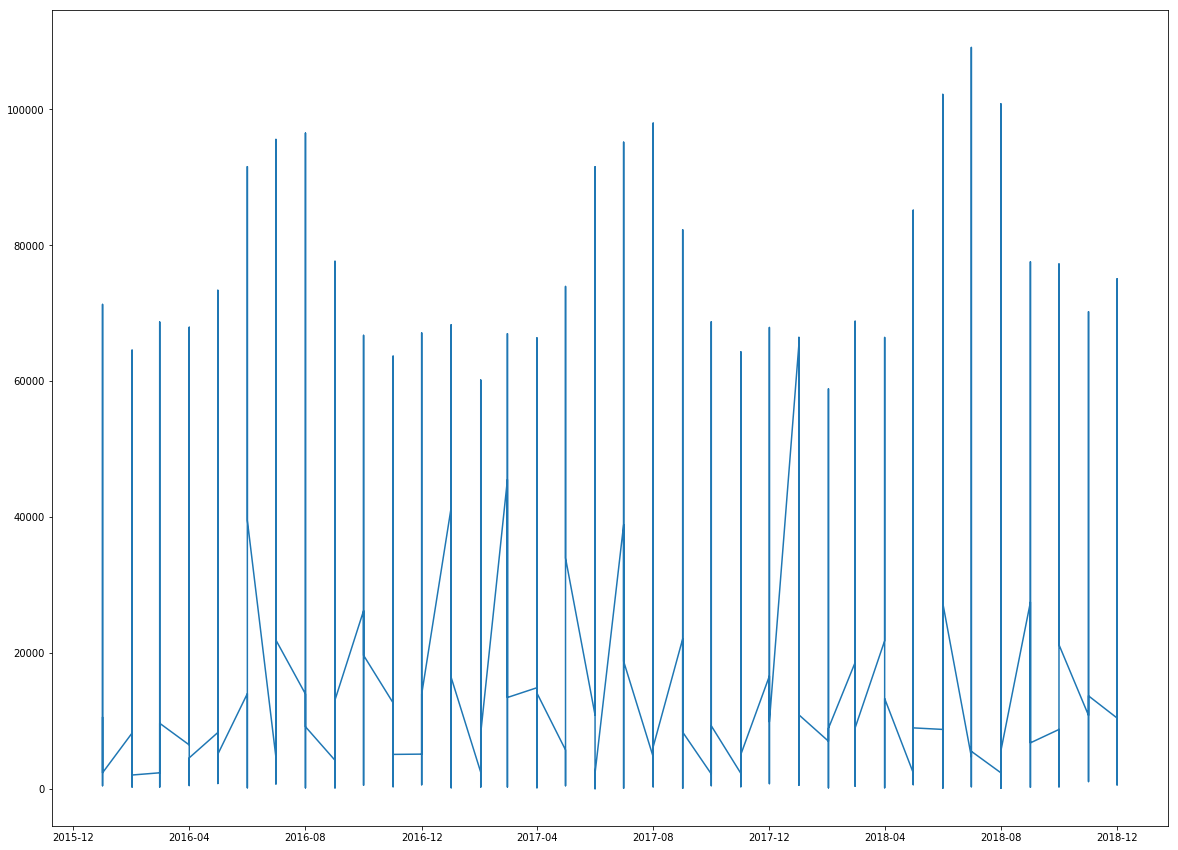

In [15]:
fig, ax = plt.subplots(figsize =(20,15))
plt.plot(data['Seats'])

In [16]:
alaska = data[data['Airline'] == 'AS']

In [17]:
alaska.head()

,Airline,Origin Code,Destination Code,Flights,Seats,ASMs,Block Mins,Average Miles
Travel Month,,,,,,,,
2016-01-01,AS,SEA,PSC,178,13528,2326816,9015,172
2016-01-01,AS,SEA,ALW,57,4332,918384,3156,212
2016-01-01,AS,SEA,JNU,61,7873,7156557,10186,909
2016-01-01,AS,SEA,PSP,64,10930,10787910,10295,987
2016-01-01,AS,SEA,ANC,401,64700,93685600,92026,1448


In [18]:
grouped = alaska.groupby('Travel Month').agg(sum)

In [19]:
grouped

,Flights,Seats,ASMs,Block Mins,Average Miles
Travel Month,,,,,
2016-01-01,8397,1051694,1095627722,1186937,105917
2016-02-01,7962,994243,1036813194,1118927,105917
2016-03-01,8810,1099968,1143450374,1214173,105917
2016-04-01,8699,1094136,1146535073,1201463,104552
2016-05-01,9018,1141595,1187332756,1251236,98837
2016-06-01,9244,1170944,1206613097,1279256,99311
2016-07-01,9496,1206444,1249294963,1326746,99311
2016-08-01,9803,1263249,1285990914,1360519,99311
2016-09-01,8558,1088305,1100717420,1163810,103203


In [20]:
grouped_seats = grouped['Seats']
grouped_seats

Travel Month
2016-01-01    1051694
2016-02-01     994243
2016-03-01    1099968
2016-04-01    1094136
2016-05-01    1141595
2016-06-01    1170944
2016-07-01    1206444
2016-08-01    1263249
2016-09-01    1088305
2016-10-01    1100999
2016-11-01    1061209
2016-12-01    1099080
2017-01-01    1111041
2017-02-01    1000481
2017-03-01    1156191
2017-04-01    1129646
2017-05-01    1184108
2017-06-01    1187905
2017-07-01    1224112
2017-08-01    1211108
2017-09-01    1111662
2017-10-01    1094002
2017-11-01    1064892
2017-12-01    1100727
2018-01-01    1123562
2018-02-01    1001874
2018-03-01    1169560
2018-04-01    1181194
2018-05-01    1238704
2018-06-01    1255117
2018-07-01    1336705
2018-08-01    1310874
2018-09-01    1183673
2018-10-01    1196157
2018-11-01    1122625
2018-12-01    1163865
Name: Seats, dtype: int64

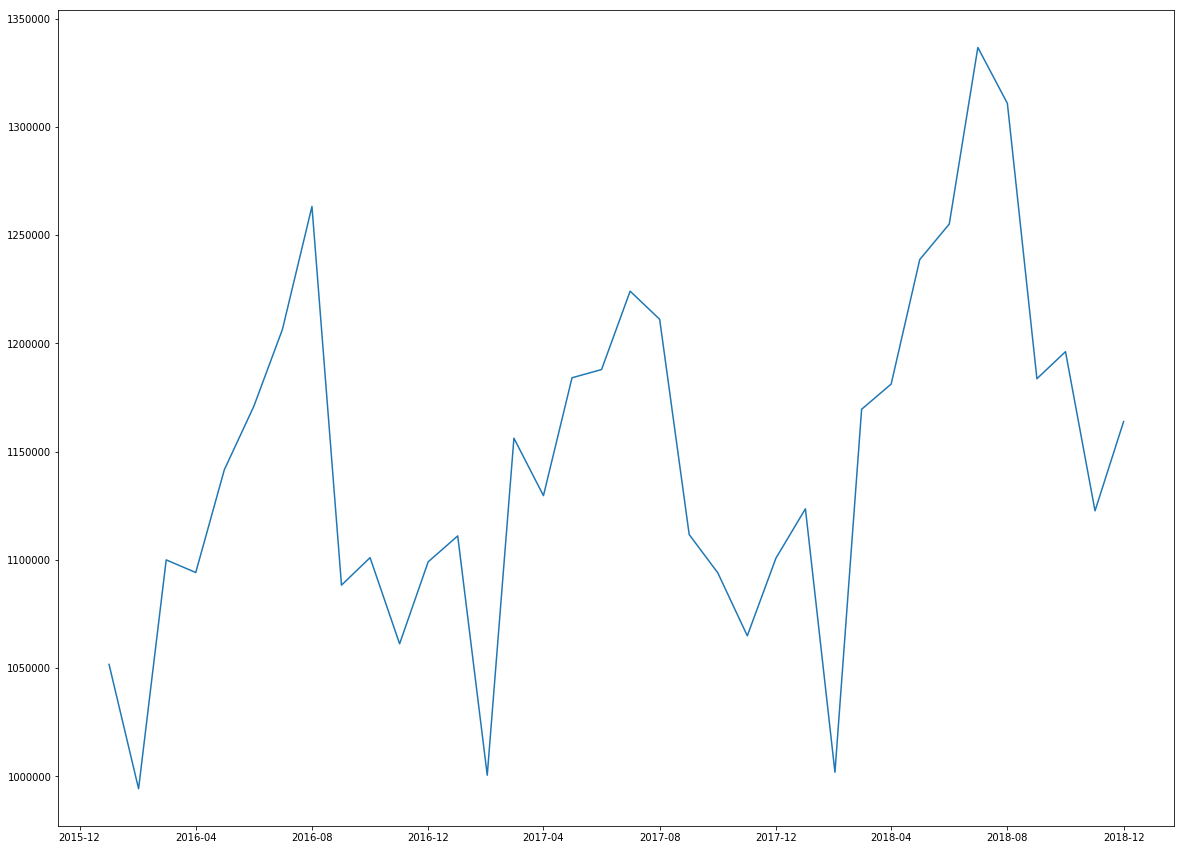

In [21]:
fig, ax = plt.subplots(figsize =(20,15))
fig = plt.plot(grouped_seats)

In [22]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=6,center=False)
    rolstd = pd.rolling_std(timeseries,window=6,center=False)

    #Plot rolling statistics:
    fig, ax = plt.subplots(figsize =(20,10))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.ylabel('Total Number of Tickets')
    plt.xlabel('Date')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

/Users/alexanderschultz/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


/Users/alexanderschultz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=6,center=False).mean()
  """
/Users/alexanderschultz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=6,center=False).std()
  


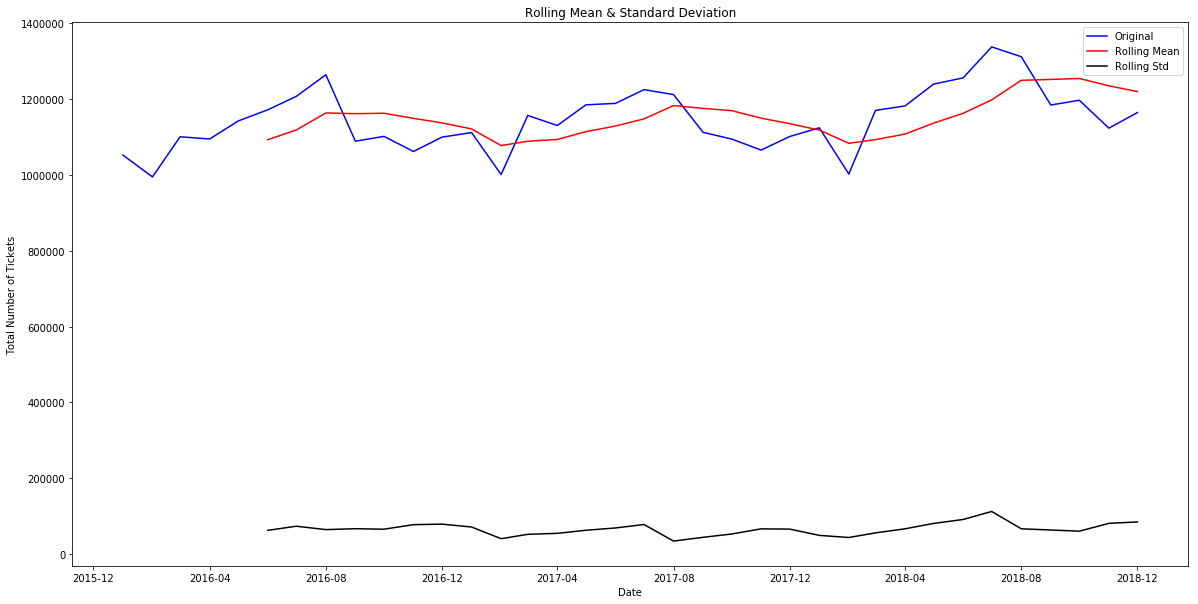

Results of Dickey-Fuller Test:
Test Statistic                 -4.030597
p-value                         0.001259
#Lags Used                      5.000000
Number of Observations Used    30.000000
Critical Value (1%)            -3.669920
Critical Value (5%)            -2.964071
Critical Value (10%)           -2.621171
dtype: float64


In [23]:
test_stationarity(grouped_seats)

## Logging the Seat data - helps reduce the trend.

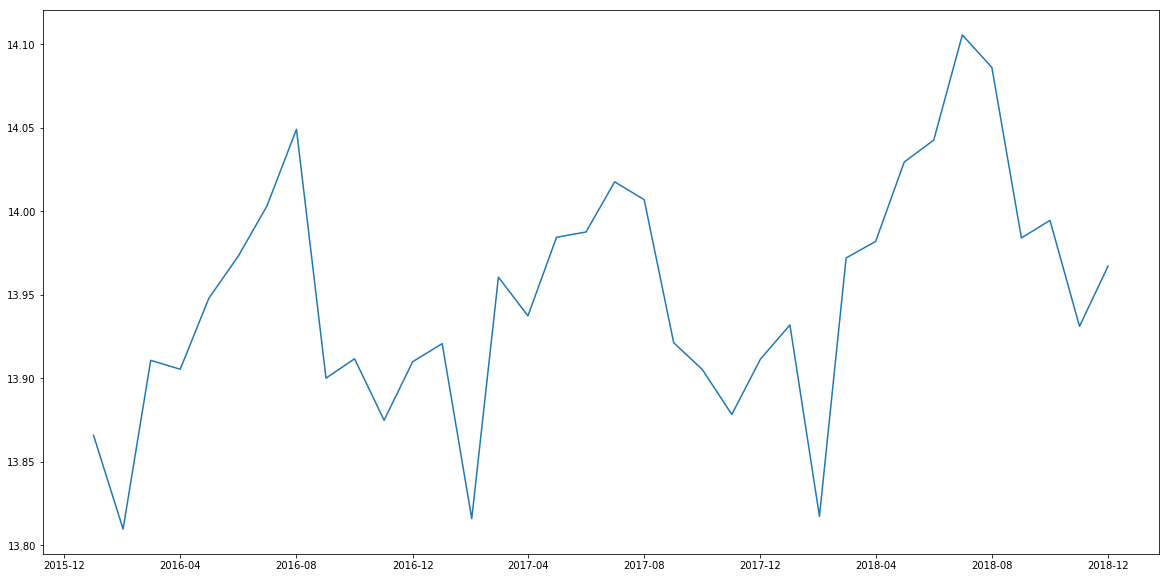

In [24]:
log_seats = np.log(grouped_seats)

fig, ax = plt.subplots(figsize =(20,10))
plt.plot(log_seats);

## Finding the 6 month rolling average

/Users/alexanderschultz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=6,center=False).mean()
  """Entry point for launching an IPython kernel.


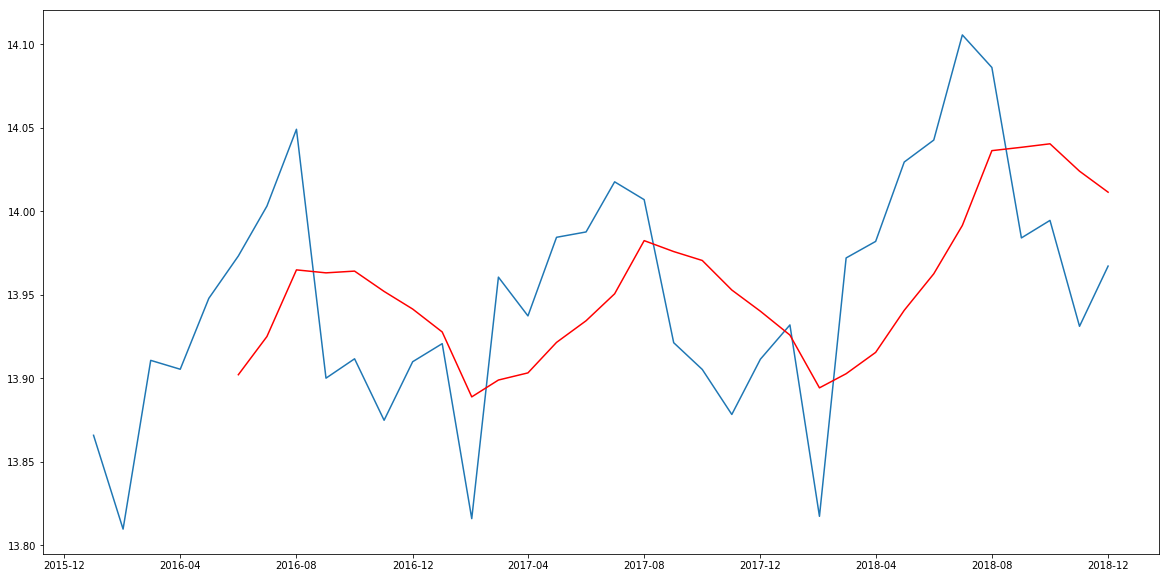

In [25]:
moving_average = pd.rolling_mean(log_seats, 6)
fig, ax = plt.subplots(figsize =(20,10))
plt.plot(log_seats)
plt.plot(moving_average, color = 'red');

In [26]:
logged_moving_average_diff = log_seats - moving_average
logged_moving_average_diff.head(10)

Travel Month
2016-01-01         NaN
2016-02-01         NaN
2016-03-01         NaN
2016-04-01         NaN
2016-05-01         NaN
2016-06-01    0.071125
2016-07-01    0.078113
2016-08-01    0.084212
2016-09-01   -0.063076
2016-10-01   -0.052522
Name: Seats, dtype: float64

/Users/alexanderschultz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=6,center=False).mean()
  """
/Users/alexanderschultz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=6,center=False).std()
  


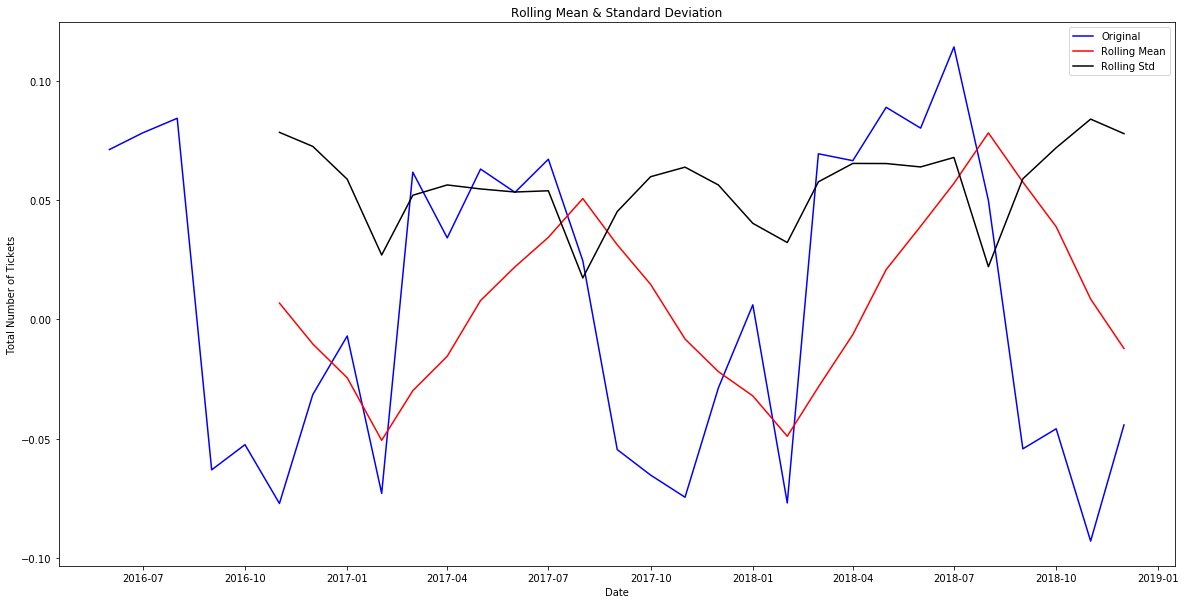

Results of Dickey-Fuller Test:
Test Statistic                 -5.332681
p-value                         0.000005
#Lags Used                      5.000000
Number of Observations Used    25.000000
Critical Value (1%)            -3.723863
Critical Value (5%)            -2.986489
Critical Value (10%)           -2.632800
dtype: float64


In [27]:
logged_moving_average_diff.dropna(inplace=True)
test_stationarity(logged_moving_average_diff)

## Exponentially Weighted Moving Average 

/Users/alexanderschultz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(halflife=6,min_periods=0,adjust=True,ignore_na=False).mean()
  """Entry point for launching an IPython kernel.


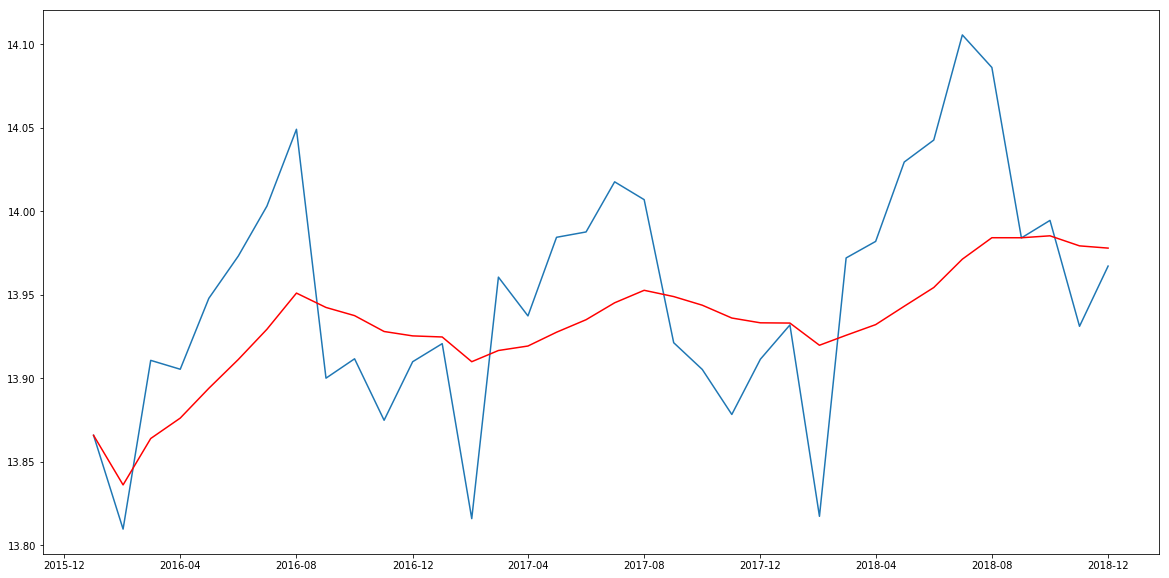

In [28]:
exp_weighted_avg = pd.ewma(log_seats, halflife=6)

fig, ax = plt.subplots(figsize =(20,10))
plt.plot(log_seats)
plt.plot(exp_weighted_avg, color='red');

/Users/alexanderschultz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=6,center=False).mean()
  """
/Users/alexanderschultz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=6,center=False).std()
  


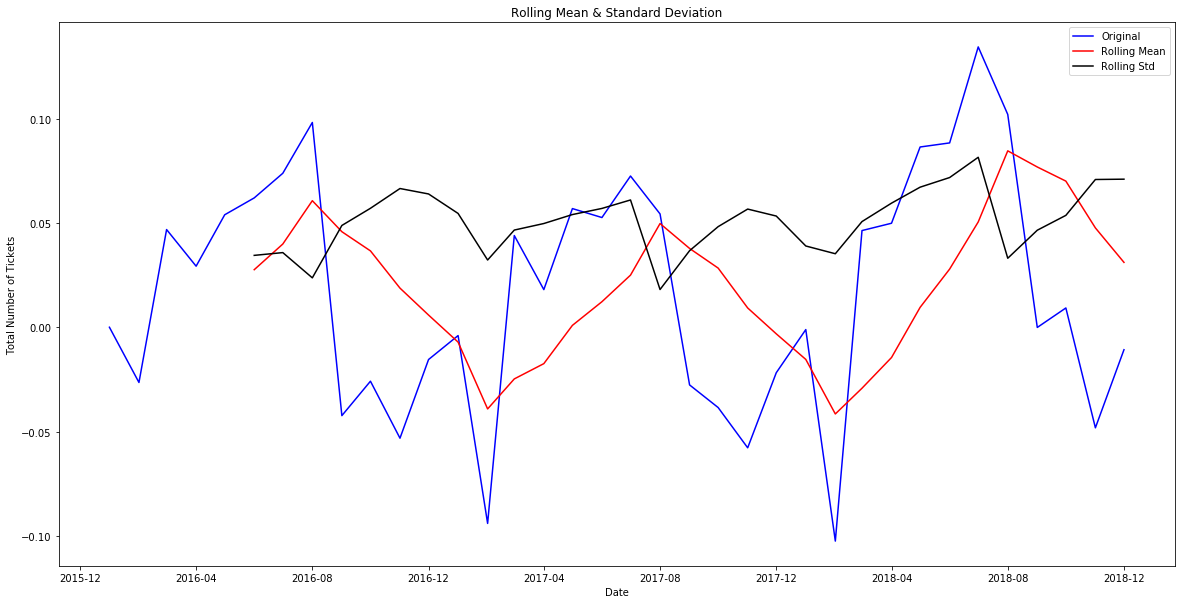

Results of Dickey-Fuller Test:
Test Statistic                -5.769745e+00
p-value                        5.427130e-07
#Lags Used                     5.000000e+00
Number of Observations Used    3.000000e+01
Critical Value (1%)           -3.669920e+00
Critical Value (5%)           -2.964071e+00
Critical Value (10%)          -2.621171e+00
dtype: float64


In [29]:
exp_weighted_avg_diff = log_seats - exp_weighted_avg
test_stationarity(exp_weighted_avg_diff)

## Eliminating Trend and Seasonality (Differencing and Decomposition)

### Differencing

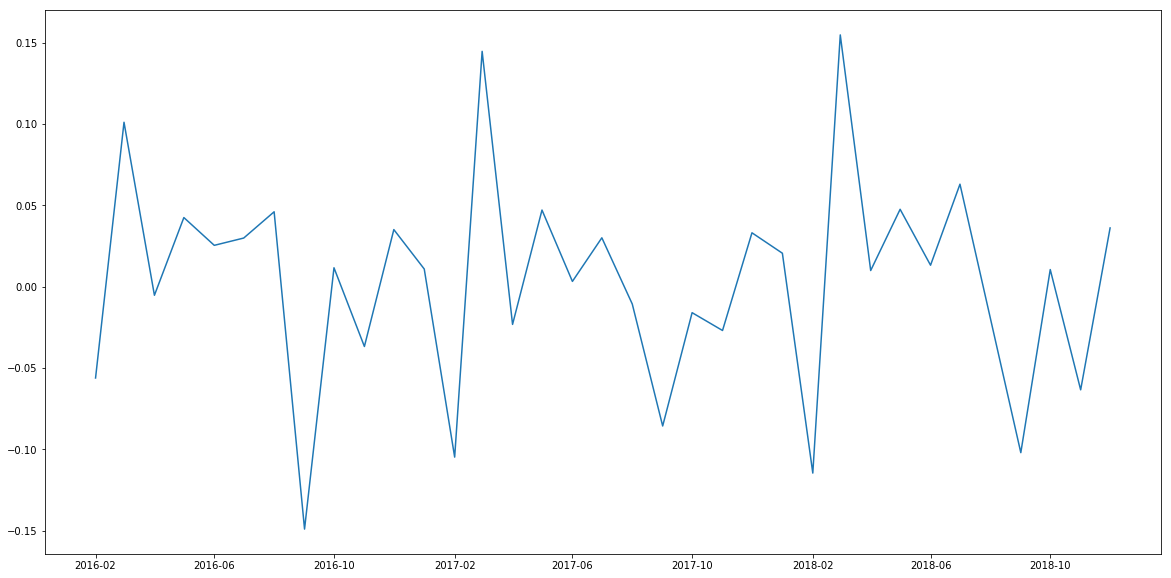

In [30]:
log_shift = log_seats - log_seats.shift()
fig, ax = plt.subplots(figsize =(20,10))
plt.plot(log_shift);

In [31]:
#looks good

/Users/alexanderschultz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=6,center=False).mean()
  """
/Users/alexanderschultz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=6,center=False).std()
  


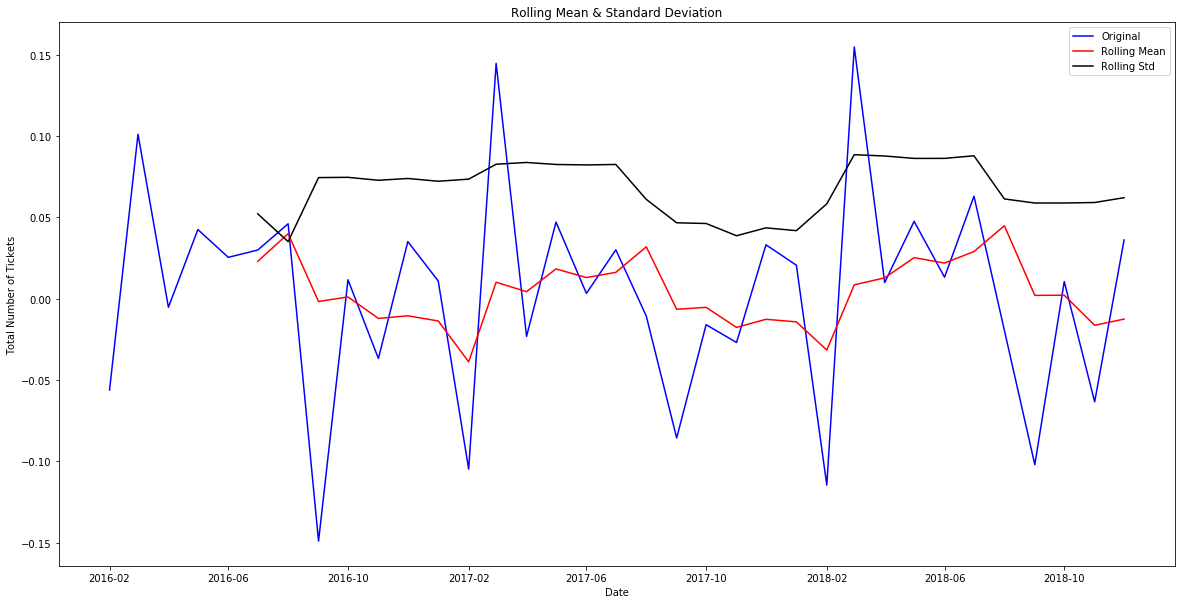

Results of Dickey-Fuller Test:
Test Statistic                 -5.478252
p-value                         0.000002
#Lags Used                     10.000000
Number of Observations Used    24.000000
Critical Value (1%)            -3.737709
Critical Value (5%)            -2.992216
Critical Value (10%)           -2.635747
dtype: float64


In [32]:
log_shift.dropna(inplace=True)
test_stationarity(log_shift);

### Decomposing

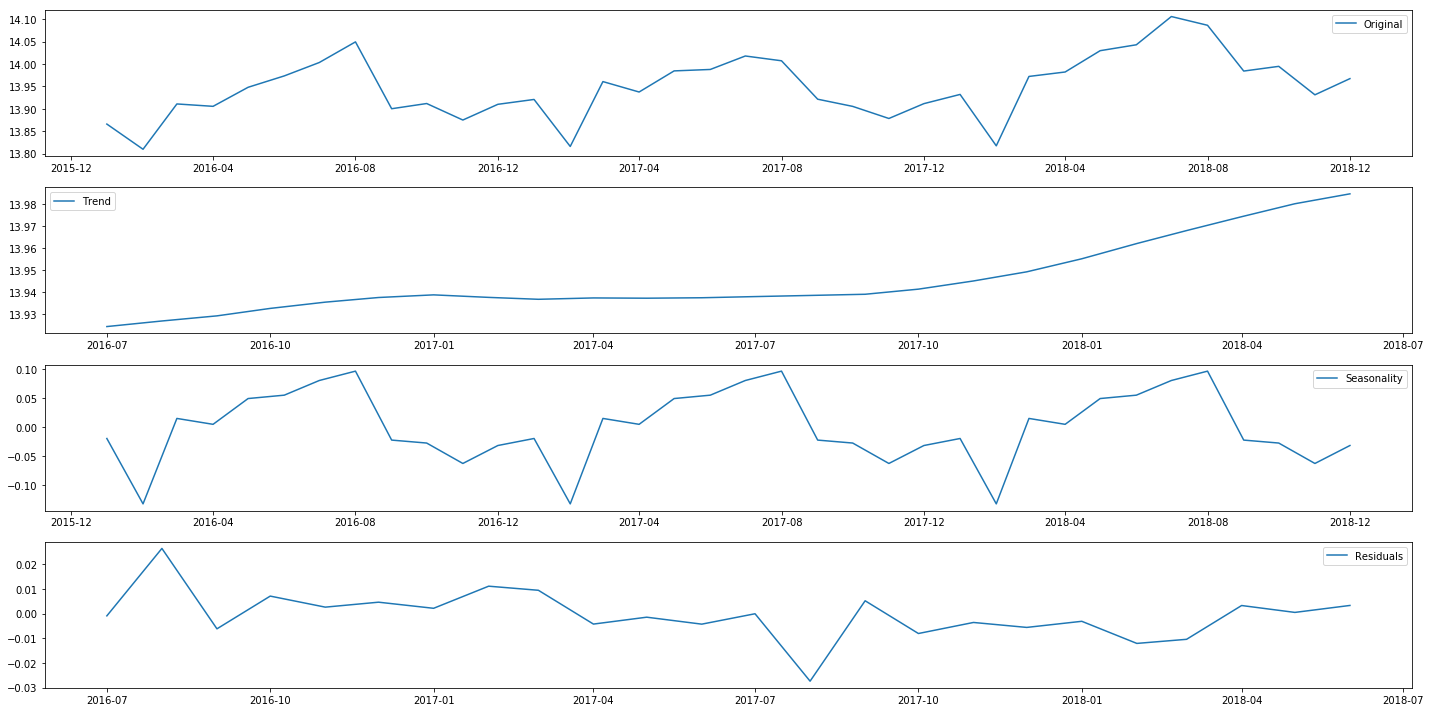

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(log_seats)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
fig, ax = plt.subplots(figsize =(20,10))
plt.subplot(411)
plt.plot(log_seats, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout();

/Users/alexanderschultz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=6,center=False).mean()
  """
/Users/alexanderschultz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=6,center=False).std()
  


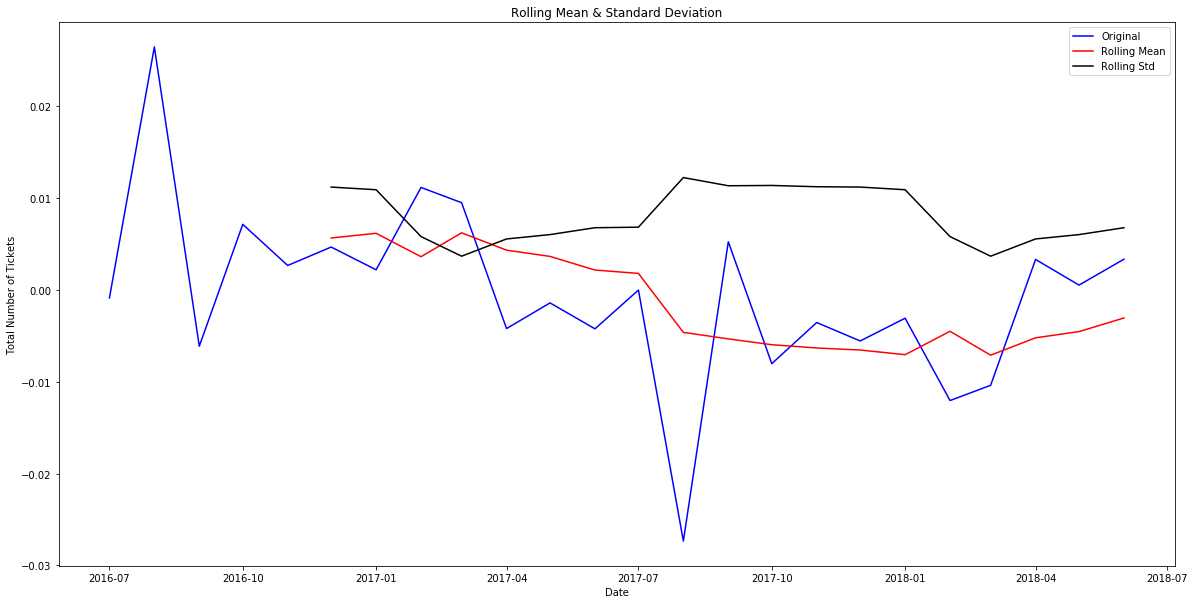

Results of Dickey-Fuller Test:
Test Statistic                 -4.732755
p-value                         0.000073
#Lags Used                      0.000000
Number of Observations Used    23.000000
Critical Value (1%)            -3.752928
Critical Value (5%)            -2.998500
Critical Value (10%)           -2.638967
dtype: float64


In [34]:
log_seats_decompose = residual
log_seats_decompose.dropna(inplace=True)
test_stationarity(log_seats_decompose)

## Forecasting a Time Series

In [35]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

In [36]:
lag_acf = acf(log_shift, nlags=20)
lag_pacf = pacf(log_shift, nlags=20, method='ols')

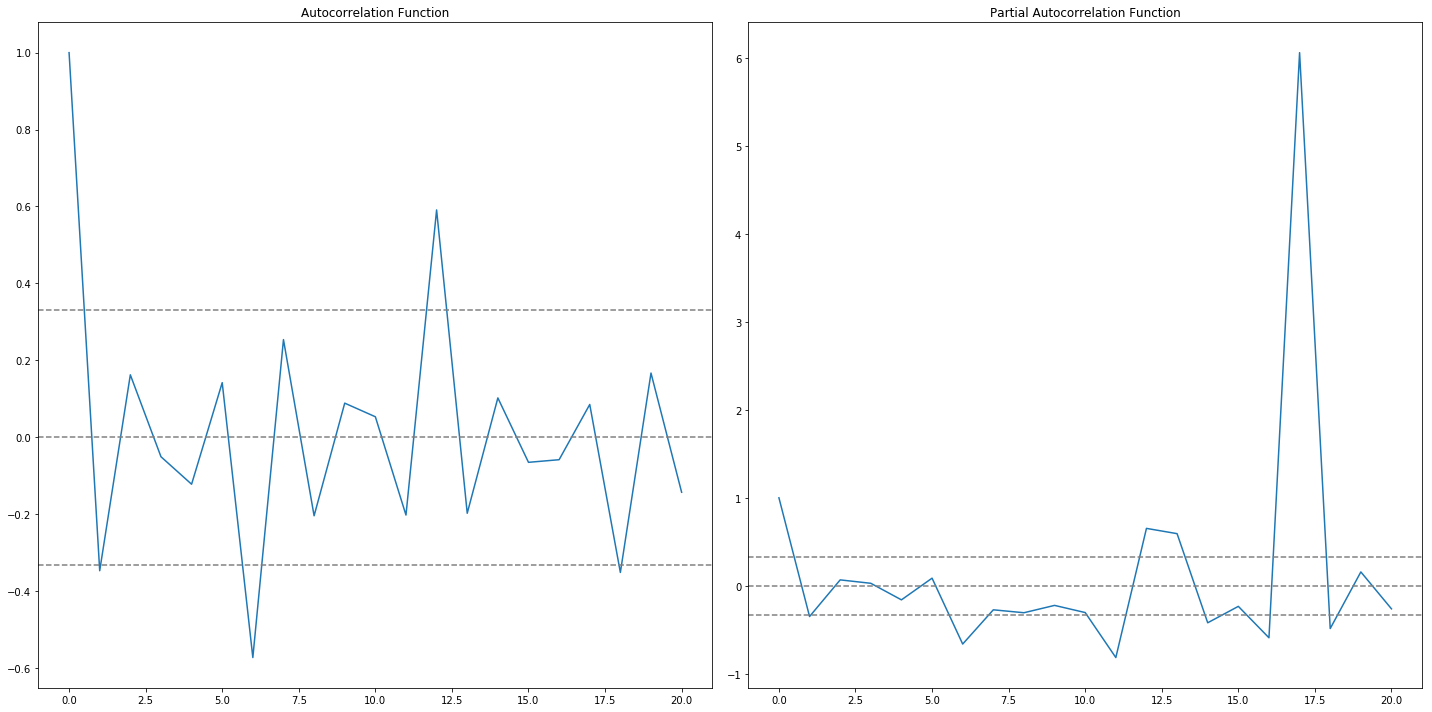

In [37]:
#Plot ACF: 
fig, ax = plt.subplots(figsize =(20,10))
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(log_shift)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(log_shift)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(log_shift)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(log_shift)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout();

# ARIMA Model

In [38]:
from statsmodels.tsa.arima_model import ARIMA

## AR Model 

Text(0.5,1,'RSS: 0.1303')

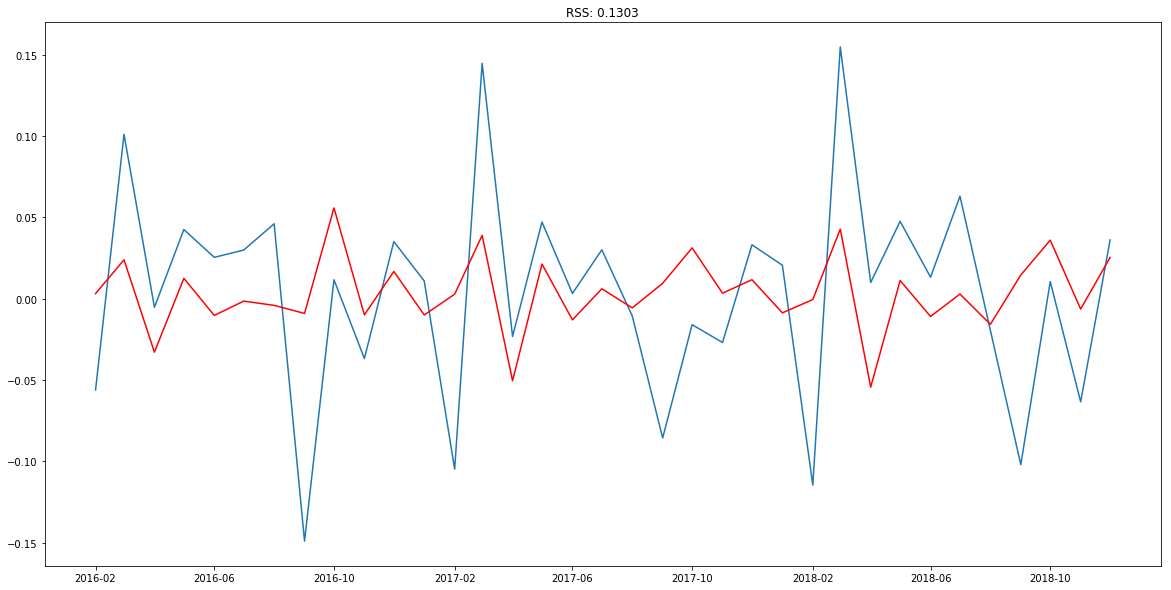

In [39]:
model = ARIMA(log_seats, order=(2,1,0))  
results_AR = model.fit(disp=-1) 

fig, ax = plt.subplots(figsize =(20,10))
plt.plot(log_shift)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-log_shift)**2))

## MA Model

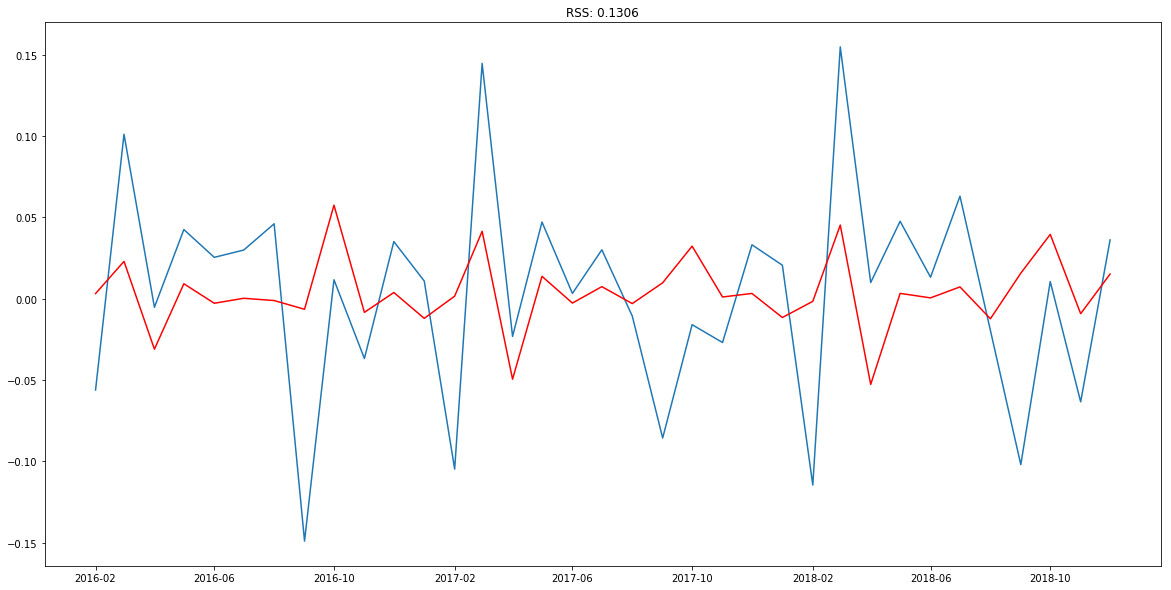

In [40]:
model = ARIMA(log_seats, order=(0, 1, 2))  
results_MA = model.fit(disp=-1) 

fig, ax = plt.subplots(figsize =(20,10))
plt.plot(log_shift)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-log_shift)**2));

## Combined Model

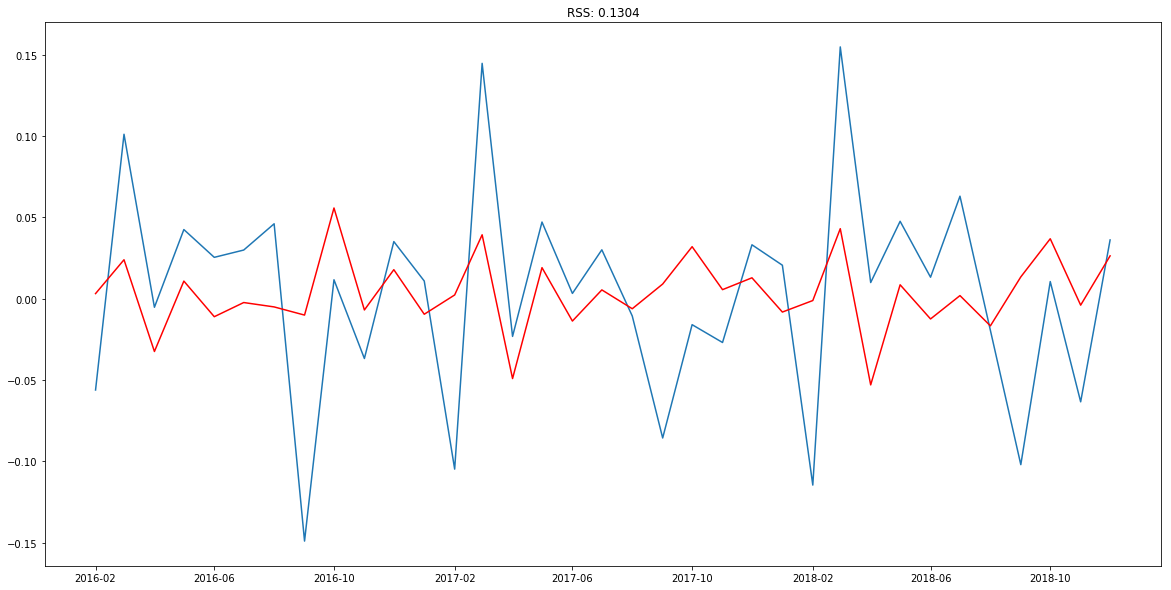

In [41]:
model = ARIMA(log_seats, order=(1,1,1))  
results_ARIMA = model.fit(disp=-1)  

fig, ax = plt.subplots(figsize =(20,10))
plt.plot(log_shift)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-log_shift)**2));

## Taking it back to scale

In [42]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

predictions_ARIMA_log = pd.Series(log_seats.iloc[0], index=log_seats.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Travel Month
2016-02-01    0.003093
2016-03-01    0.023907
2016-04-01   -0.032503
2016-05-01    0.010782
2016-06-01   -0.011110
dtype: float64
Travel Month
2016-02-01    0.003093
2016-03-01    0.027000
2016-04-01   -0.005504
2016-05-01    0.005279
2016-06-01   -0.005831
dtype: float64


Travel Month
2016-01-01    13.865913
2016-02-01    13.869006
2016-03-01    13.892913
2016-04-01    13.860409
2016-05-01    13.871192
dtype: float64

# Plot Predictions against Actual

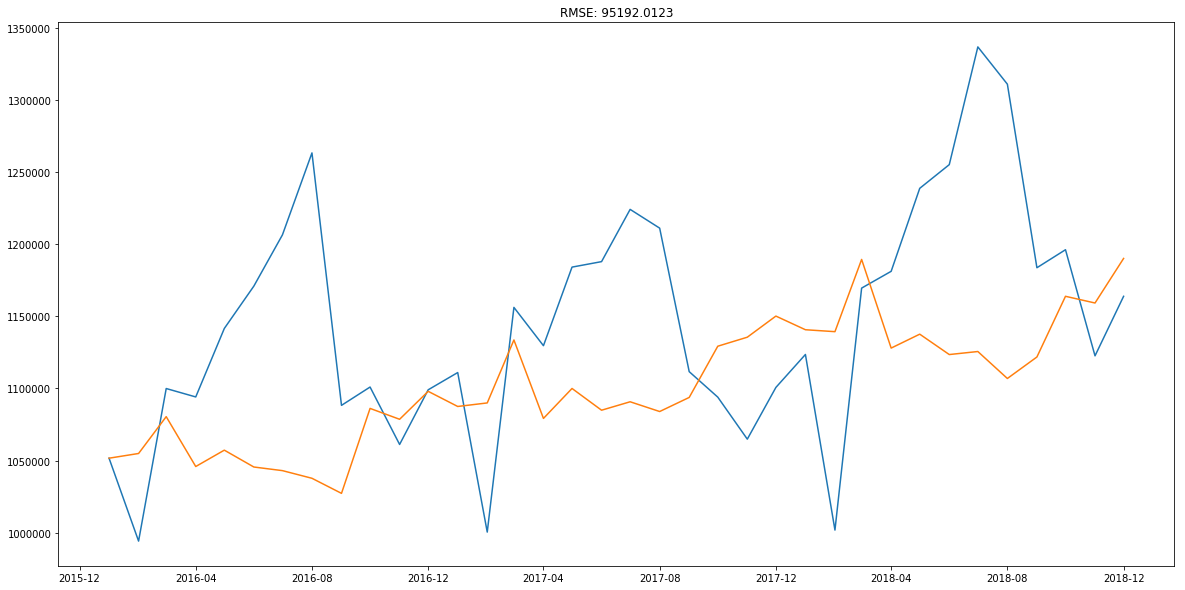

In [43]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)

fig, ax = plt.subplots(figsize =(20,10))
plt.plot(grouped_seats)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-grouped_seats)**2)/len(grouped_seats)));

# Southwest Example - WN


In [44]:
data.head()

,Airline,Origin Code,Destination Code,Flights,Seats,ASMs,Block Mins,Average Miles
Travel Month,,,,,,,,
2016-01-01,AA,SEA,CLT,56,10472,23865688,16112,2279
2016-01-01,HA,SEA,OGG,31,9114,24060960,11470,2640
2016-01-01,AS,SEA,PSC,178,13528,2326816,9015,172
2016-01-01,DL,SEA,DEN,121,9877,10114048,19399,1024
2016-01-01,WN,SEA,SAN,70,10042,10544100,11155,1050


In [45]:
southwest = data[data['Airline'] == 'WN']
southwest.head()

,Airline,Origin Code,Destination Code,Flights,Seats,ASMs,Block Mins,Average Miles
Travel Month,,,,,,,,
2016-01-01,WN,SEA,SAN,70,10042,10544100,11155,1050
2016-01-01,WN,SEA,PHX,89,14385,15924195,14800,1107
2016-01-01,WN,SEA,SJC,57,8183,5703551,6960,697
2016-01-01,WN,SEA,SNA,79,11297,11048466,12685,978
2016-01-01,WN,SEA,SMF,76,11472,6940560,7860,605


In [46]:
grouped_sw = southwest.groupby('Travel Month').agg(sum)
grouped_sw.head()

,Flights,Seats,ASMs,Block Mins,Average Miles
Travel Month,,,,,
2016-01-01,920,136206,144289606,147815,16200
2016-02-01,830,122892,130522114,133835,16200
2016-03-01,909,135435,147997747,147985,16200
2016-04-01,980,145692,158795110,160230,17909
2016-05-01,1122,166408,186401178,188565,19886


In [47]:
grouped_sw_seats = grouped_sw['Seats']
grouped_sw_seats

Travel Month
2016-01-01    136206
2016-02-01    122892
2016-03-01    135435
2016-04-01    145692
2016-05-01    166408
2016-06-01    214760
2016-07-01    230027
2016-08-01    204138
2016-09-01    182475
2016-10-01    187055
2016-11-01    164190
2016-12-01    163981
2017-01-01    127391
2017-02-01    107828
2017-03-01    128870
2017-04-01    128439
2017-05-01    143052
2017-06-01    183732
2017-07-01    194593
2017-08-01    197294
2017-09-01    160615
2017-10-01    157855
2017-11-01    152670
2017-12-01    148587
2018-01-01    138174
2018-02-01    116810
2018-03-01    147501
2018-04-01    155502
2018-05-01    163136
2018-06-01    183963
2018-07-01    195439
2018-08-01    190241
2018-09-01    169211
2018-10-01    165215
Name: Seats, dtype: int64

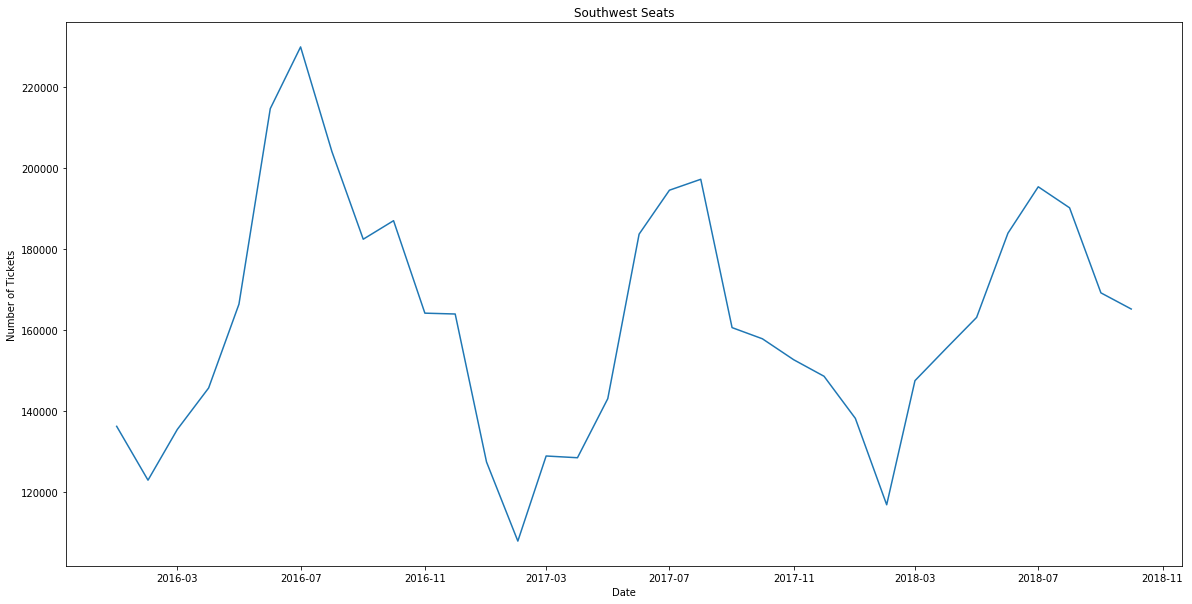

In [48]:
fig, ax = plt.subplots(figsize =(20,10))
fig = plt.plot(grouped_sw_seats)
plt.title('Southwest Seats')
plt.xlabel('Date')
plt.ylabel('Number of Tickets');

/Users/alexanderschultz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=6,center=False).mean()
  """
/Users/alexanderschultz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=6,center=False).std()
  


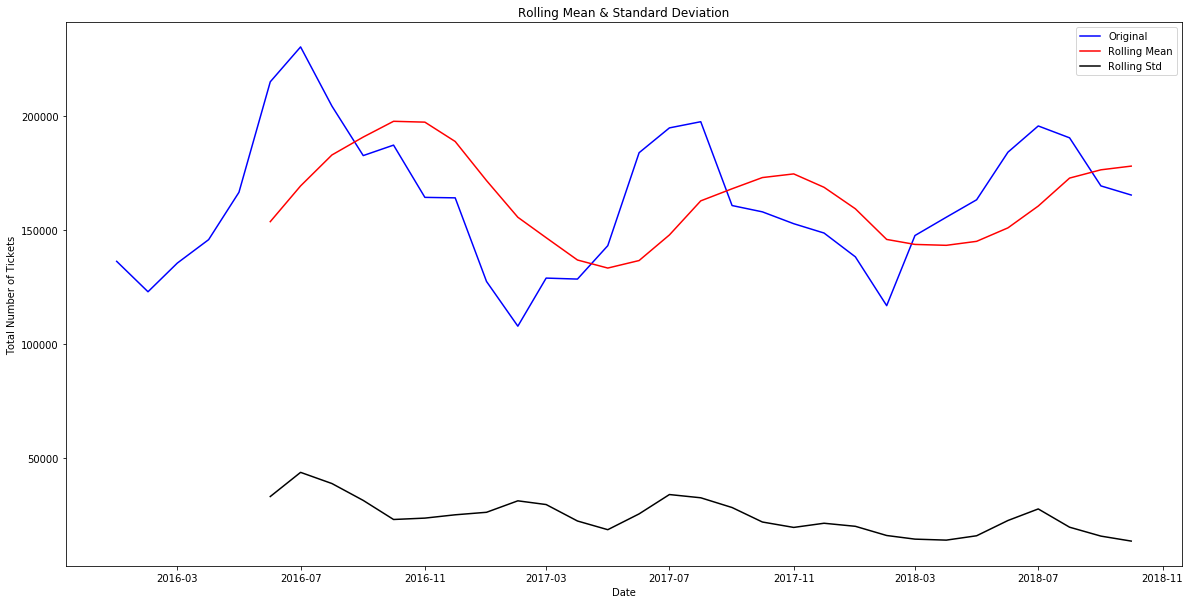

Results of Dickey-Fuller Test:
Test Statistic                 -4.213198
p-value                         0.000626
#Lags Used                      5.000000
Number of Observations Used    28.000000
Critical Value (1%)            -3.688926
Critical Value (5%)            -2.971989
Critical Value (10%)           -2.625296
dtype: float64


In [49]:
test_stationarity(grouped_sw_seats)

## Log the Southwest Data

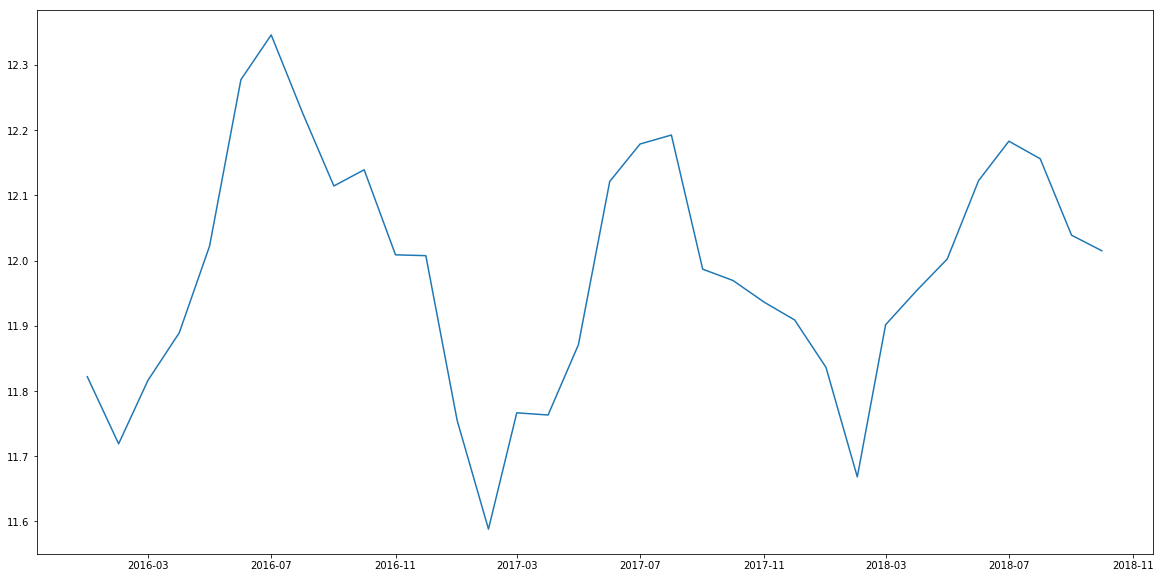

In [50]:
log_sw_seats = np.log(grouped_sw_seats)

fig, ax = plt.subplots(figsize =(20,10))
plt.plot(log_sw_seats);

## Finding the six month rolling average 

/Users/alexanderschultz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=6,center=False).mean()
  """Entry point for launching an IPython kernel.


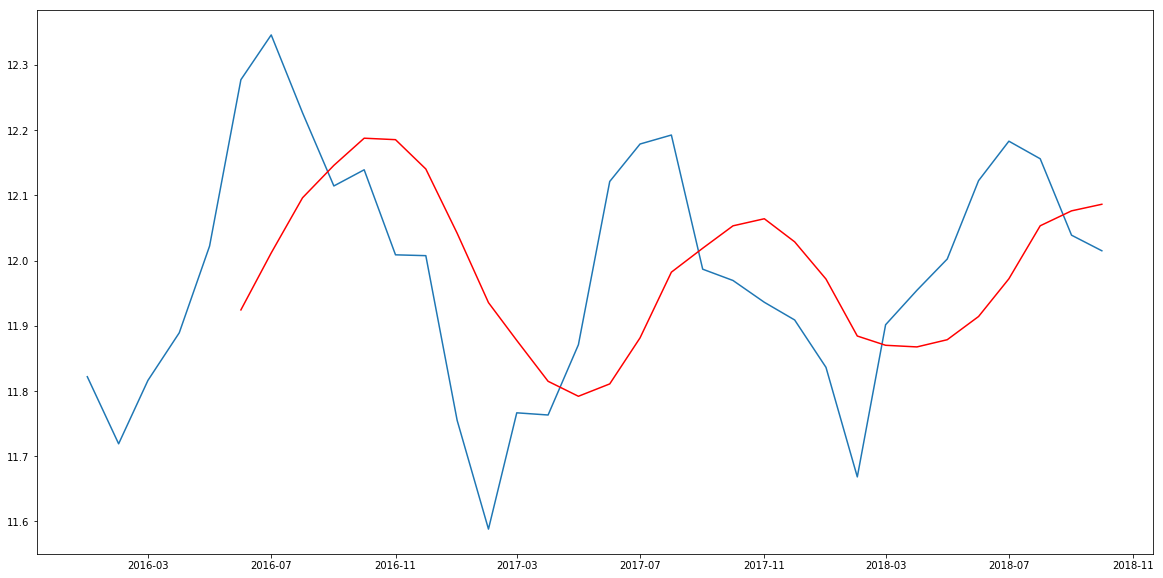

In [51]:
moving_sw_average = pd.rolling_mean(log_sw_seats, 6)
fig, ax = plt.subplots(figsize =(20,10))
plt.plot(log_sw_seats)
plt.plot(moving_sw_average, color = 'red');

## Removing the rolling average from the initial data set 

In [52]:
moving_average_diff_sw = log_sw_seats - moving_sw_average
moving_average_diff_sw.head(10)

Travel Month
2016-01-01         NaN
2016-02-01         NaN
2016-03-01         NaN
2016-04-01         NaN
2016-05-01         NaN
2016-06-01    0.352950
2016-07-01    0.334288
2016-08-01    0.130306
2016-09-01   -0.031564
2016-10-01   -0.048426
Name: Seats, dtype: float64

### Get rid of NANs test for stationarity

/Users/alexanderschultz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=6,center=False).mean()
  """
/Users/alexanderschultz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=6,center=False).std()
  


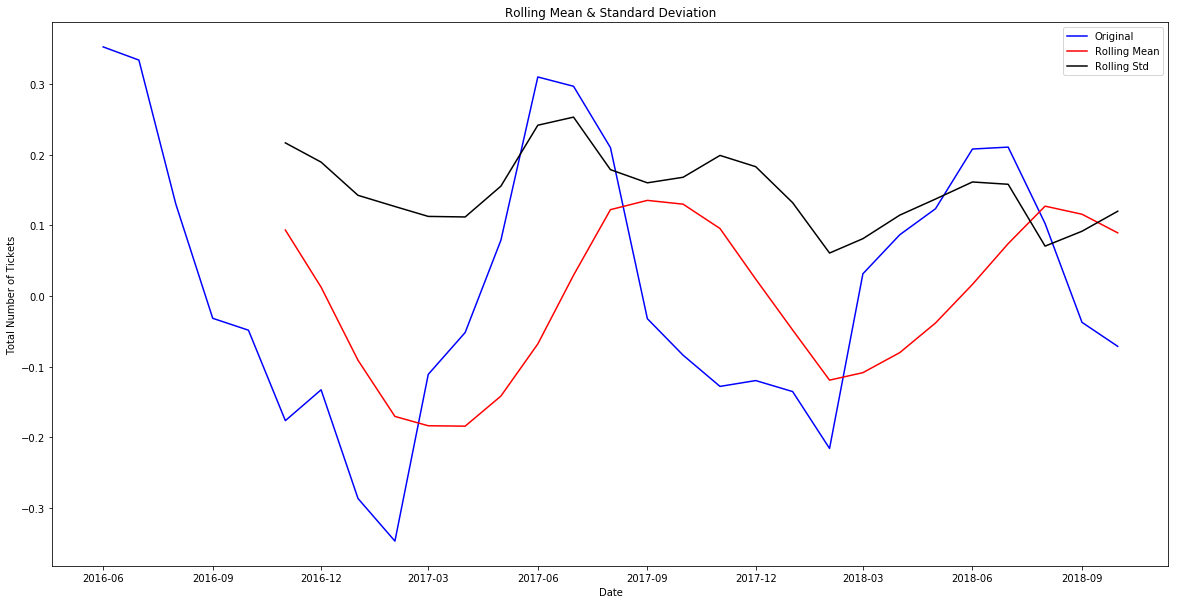

Results of Dickey-Fuller Test:
Test Statistic                 -4.016010
p-value                         0.001329
#Lags Used                      5.000000
Number of Observations Used    23.000000
Critical Value (1%)            -3.752928
Critical Value (5%)            -2.998500
Critical Value (10%)           -2.638967
dtype: float64


In [53]:
moving_average_diff_sw.dropna(inplace=True)
test_stationarity(moving_average_diff_sw)

## Exponentially Weighted Moving Average

/Users/alexanderschultz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(halflife=6,min_periods=0,adjust=True,ignore_na=False).mean()
  """Entry point for launching an IPython kernel.


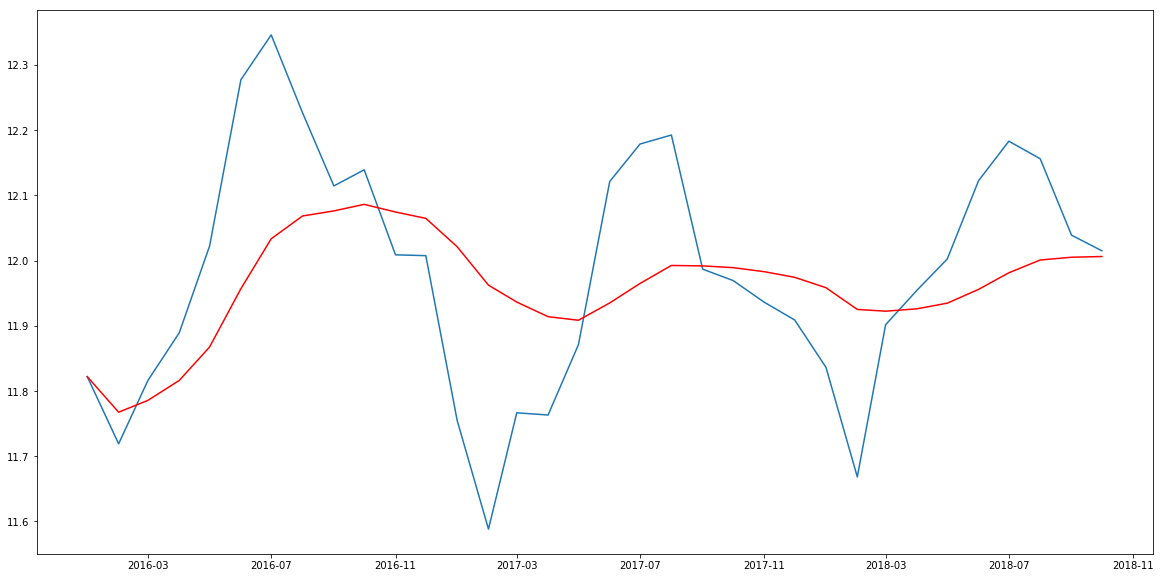

In [54]:
exp_weighted_avg_sw = pd.ewma(log_sw_seats, halflife=6)

fig, ax = plt.subplots(figsize =(20,10))
plt.plot(log_sw_seats)
plt.plot(exp_weighted_avg_sw, color='red');

### Test for stationarity 

/Users/alexanderschultz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=6,center=False).mean()
  """
/Users/alexanderschultz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=6,center=False).std()
  


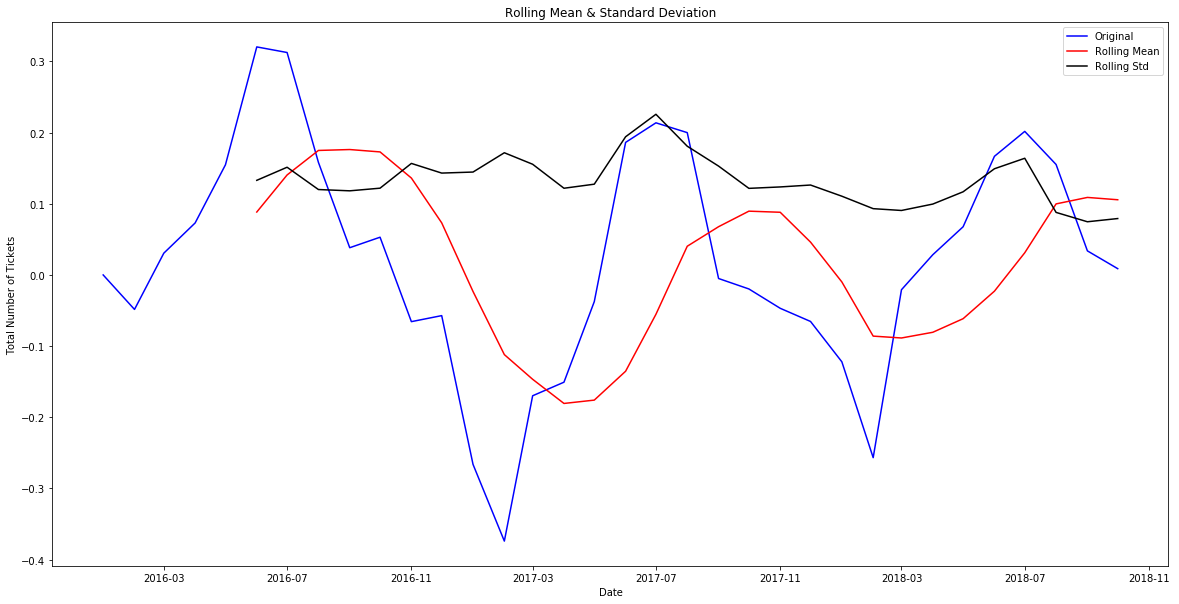

Results of Dickey-Fuller Test:
Test Statistic                 -4.120481
p-value                         0.000896
#Lags Used                      5.000000
Number of Observations Used    28.000000
Critical Value (1%)            -3.688926
Critical Value (5%)            -2.971989
Critical Value (10%)           -2.625296
dtype: float64


In [55]:
exp_weighted_avg_diff_sw = log_sw_seats - exp_weighted_avg_sw
test_stationarity(exp_weighted_avg_diff_sw)

## Eliminating Trend and Seasonality (Differencing and Decomposition)

### Differencing 

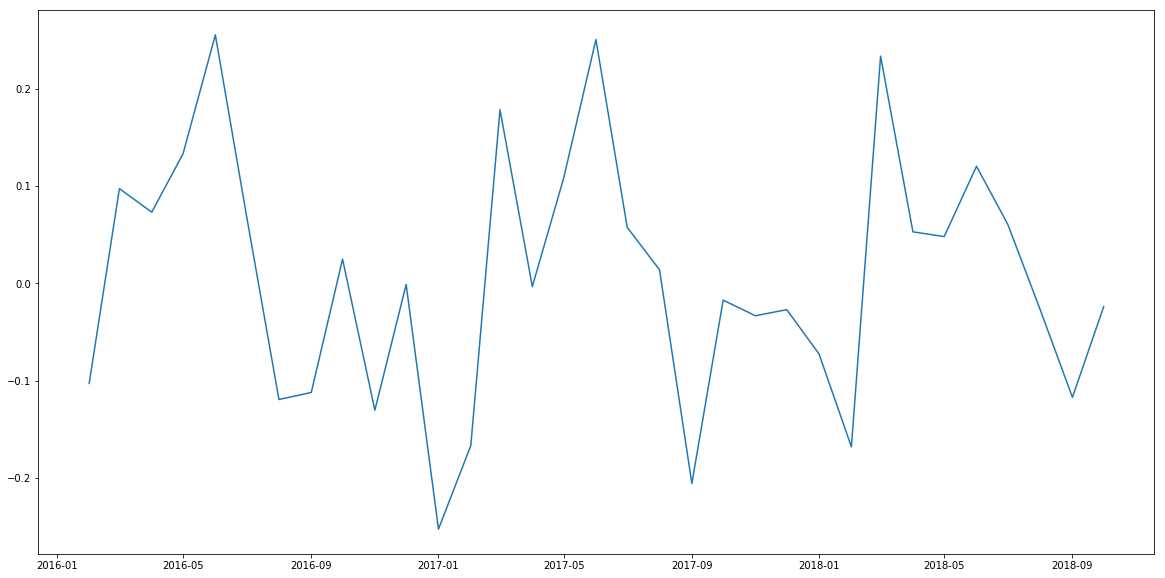

In [56]:
log_shift_sw = log_sw_seats - log_sw_seats.shift()
fig, ax = plt.subplots(figsize =(20,10))
plt.plot(log_shift_sw);

### Drop NANs

/Users/alexanderschultz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=6,center=False).mean()
  """
/Users/alexanderschultz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=6,center=False).std()
  


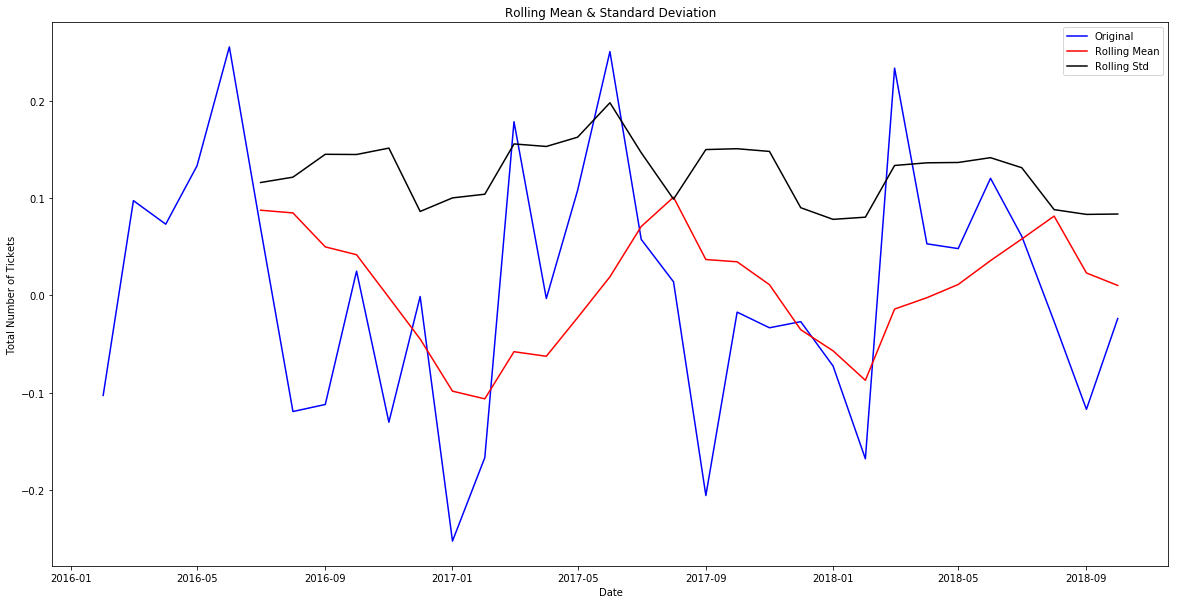

Results of Dickey-Fuller Test:
Test Statistic                 -3.693825
p-value                         0.004201
#Lags Used                     10.000000
Number of Observations Used    22.000000
Critical Value (1%)            -3.769733
Critical Value (5%)            -3.005426
Critical Value (10%)           -2.642501
dtype: float64


In [57]:
log_shift_sw.dropna(inplace=True)
test_stationarity(log_shift_sw);

### Decomposing 

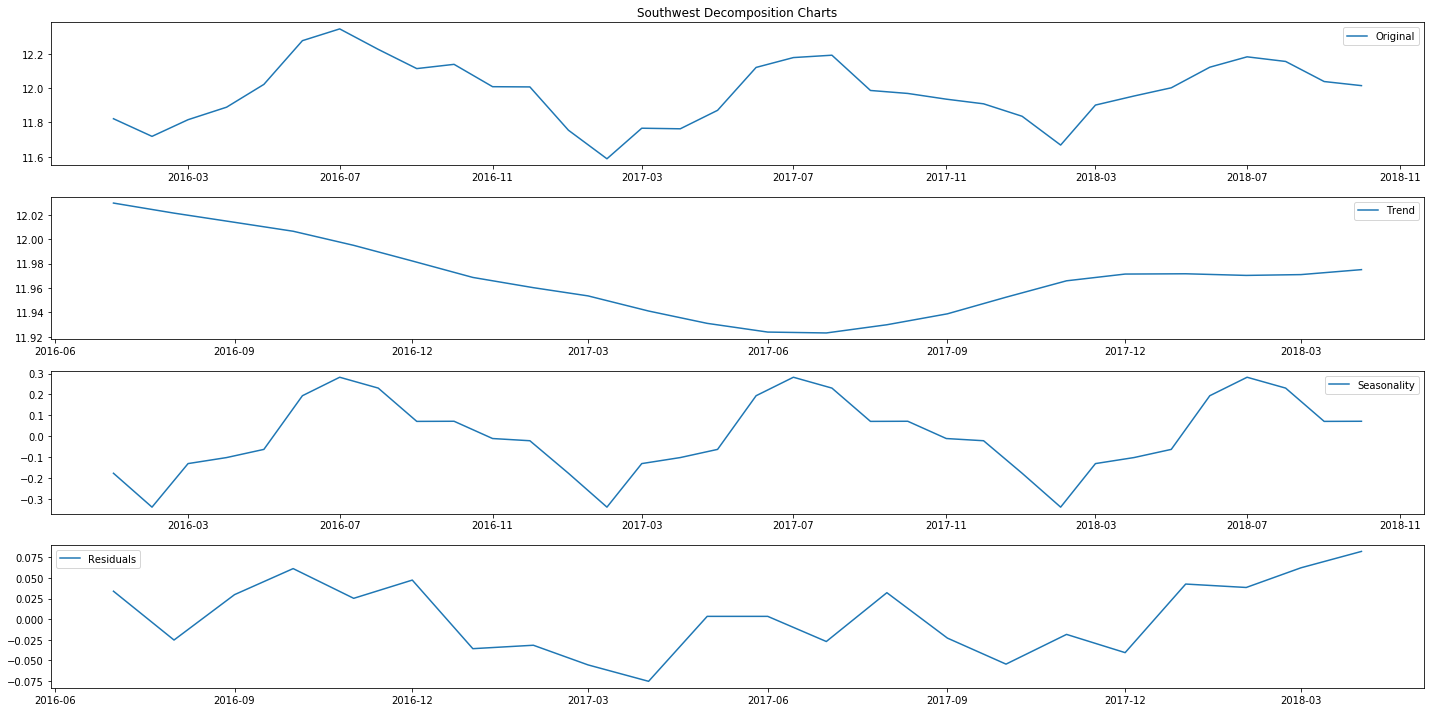

In [58]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(log_sw_seats)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
fig, ax = plt.subplots(figsize =(20,10))
plt.subplot(411)
plt.title('Southwest Decomposition Charts')
plt.plot(log_sw_seats, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout();

### Checking for stationarity 

/Users/alexanderschultz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=6,center=False).mean()
  """
/Users/alexanderschultz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=6,center=False).std()
  


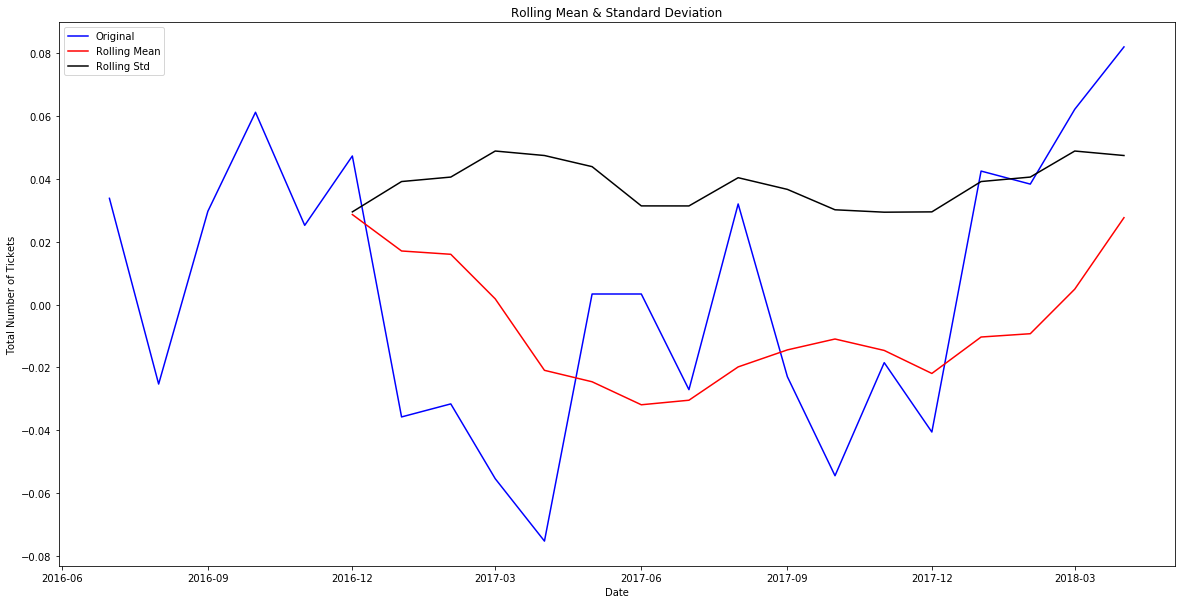

Results of Dickey-Fuller Test:
Test Statistic                 -0.260680
p-value                         0.930892
#Lags Used                      9.000000
Number of Observations Used    12.000000
Critical Value (1%)            -4.137829
Critical Value (5%)            -3.154972
Critical Value (10%)           -2.714477
dtype: float64


In [59]:
log_seats_decompose_sw = residual
log_seats_decompose_sw.dropna(inplace=True)
test_stationarity(log_seats_decompose_sw)

# Forecasting Southwest Time Series

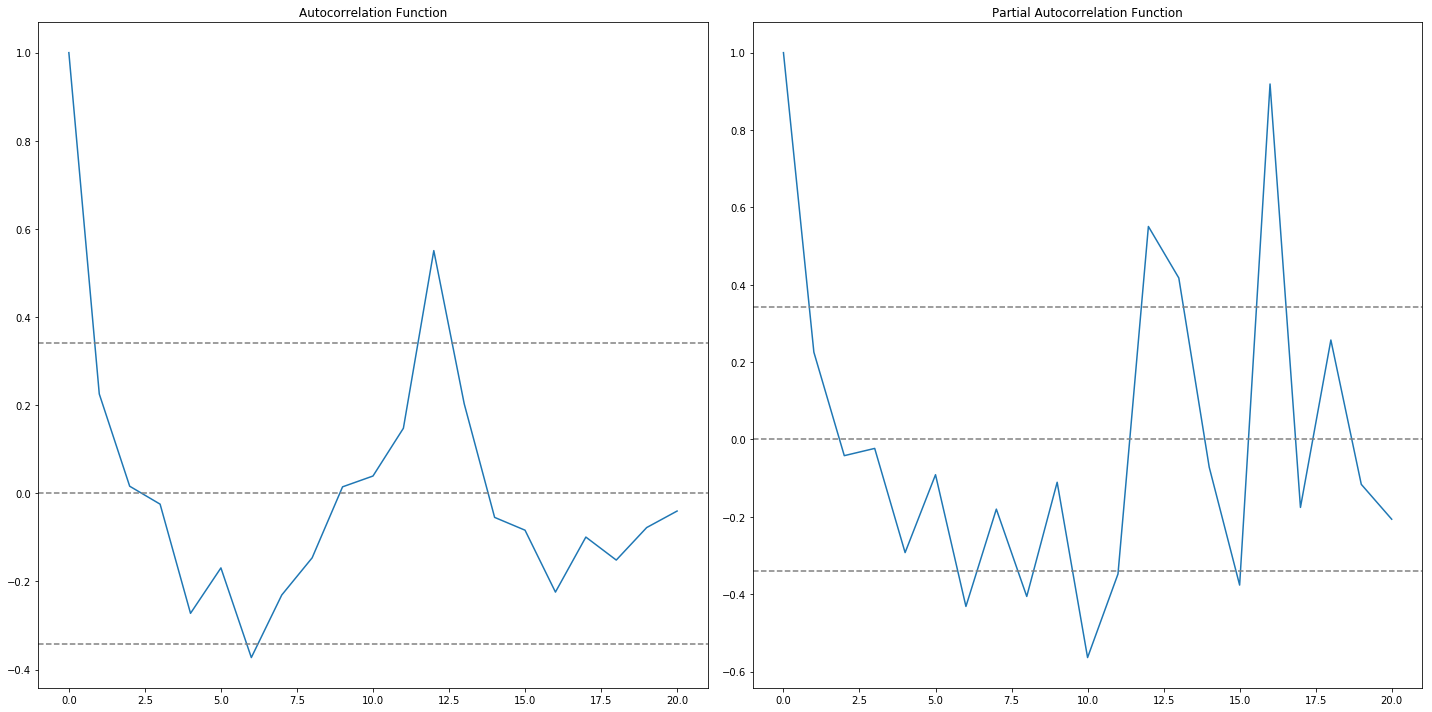

In [60]:
lag_acf_sw = acf(log_shift_sw, nlags=20)
lag_pacf_sw = pacf(log_shift_sw, nlags=20, method='ols')

#Plot ACF: 
fig, ax = plt.subplots(figsize =(20,10))
plt.subplot(121) 
plt.plot(lag_acf_sw)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(log_shift_sw)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(log_shift_sw)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf_sw)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(log_shift_sw)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(log_shift_sw)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout();

# ARIMA Model - Southwest

## AR Model

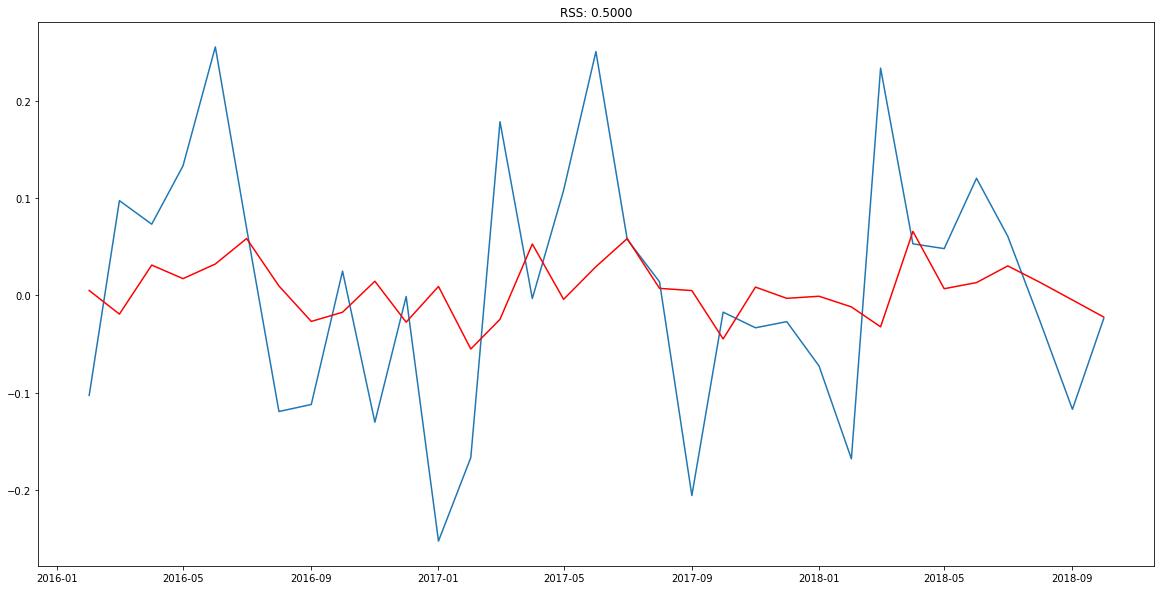

In [61]:
model = ARIMA(log_sw_seats, order=(2,1,0))  
results_AR = model.fit(disp=-1) 

fig, ax = plt.subplots(figsize =(20,10))
plt.plot(log_shift_sw)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-log_shift_sw)**2));

## MA Model 

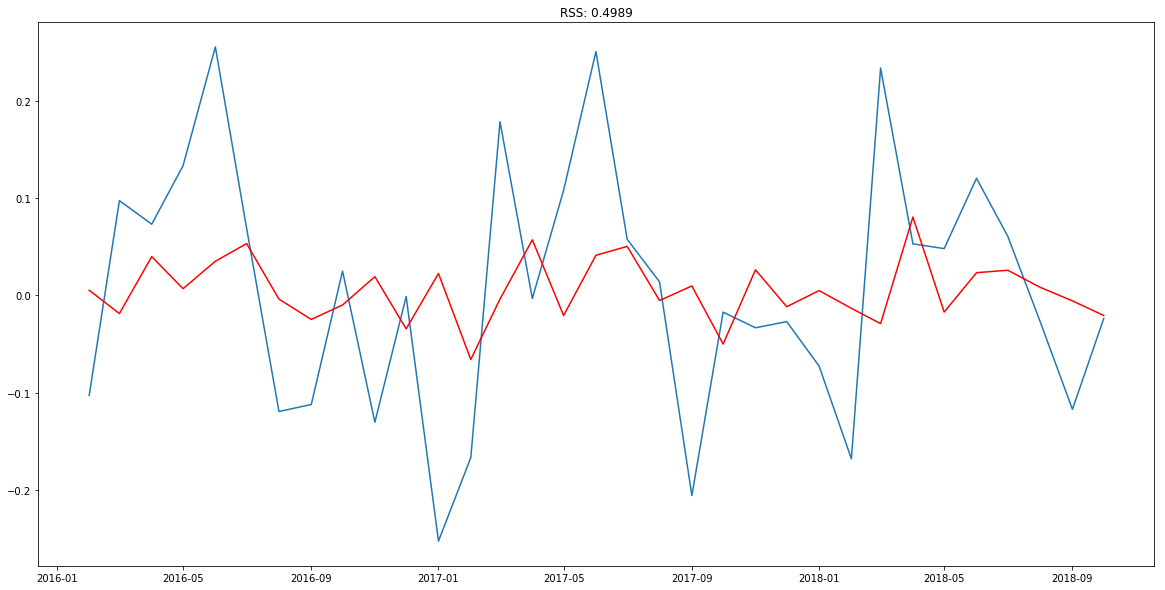

In [62]:
model = ARIMA(log_sw_seats, order=(0, 1, 2))  
results_MA = model.fit(disp=-1) 

fig, ax = plt.subplots(figsize =(20,10))
plt.plot(log_shift_sw)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-log_shift_sw)**2));

## Combined Model 

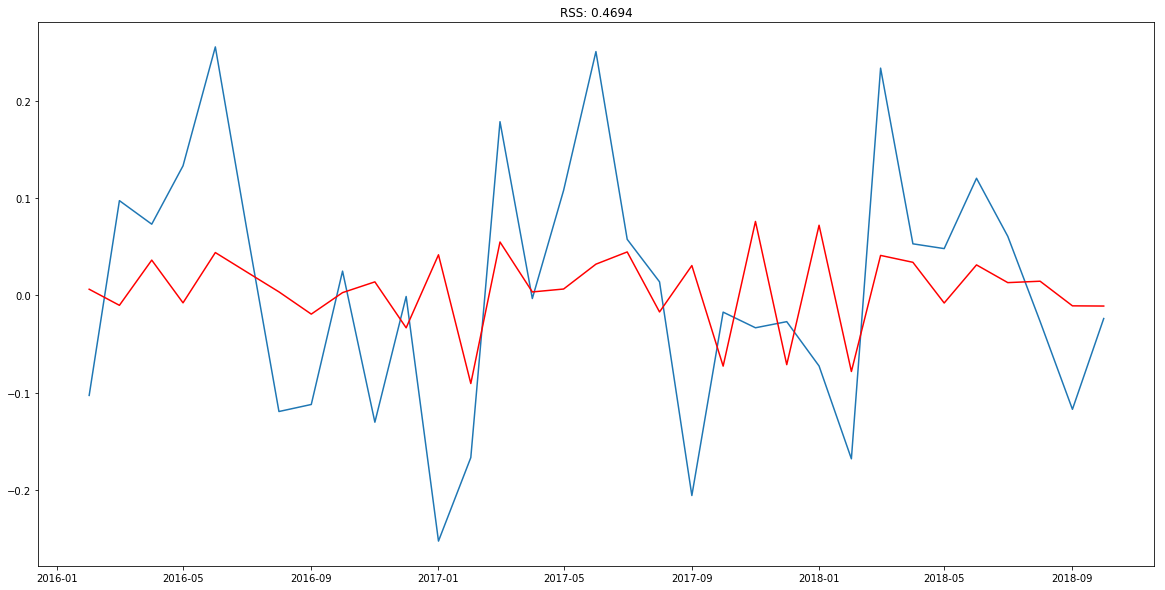

In [63]:
model = ARIMA(log_sw_seats, order=(1,1,1))  
results_ARIMA = model.fit(disp=-1)  

fig, ax = plt.subplots(figsize =(20,10))
plt.plot(log_shift_sw)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-log_shift_sw)**2));

## Bringing it back to scale

In [64]:
predictions_ARIMA_diff_sw = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff_sw.head())

predictions_ARIMA_diff_cumsum_sw = predictions_ARIMA_diff_sw.cumsum()
print(predictions_ARIMA_diff_cumsum_sw.head())

predictions_ARIMA_log_sw = pd.Series(log_sw_seats.iloc[0], index=log_sw_seats.index)
predictions_ARIMA_log_sw = predictions_ARIMA_log_sw.add(predictions_ARIMA_diff_cumsum_sw,fill_value=0)
predictions_ARIMA_log_sw.head()

Travel Month
2016-02-01    0.006182
2016-03-01   -0.010331
2016-04-01    0.036105
2016-05-01   -0.007774
2016-06-01    0.043856
dtype: float64
Travel Month
2016-02-01    0.006182
2016-03-01   -0.004149
2016-04-01    0.031956
2016-05-01    0.024182
2016-06-01    0.068038
dtype: float64


Travel Month
2016-01-01    11.821924
2016-02-01    11.828106
2016-03-01    11.817775
2016-04-01    11.853880
2016-05-01    11.846106
dtype: float64

# Make Predictions

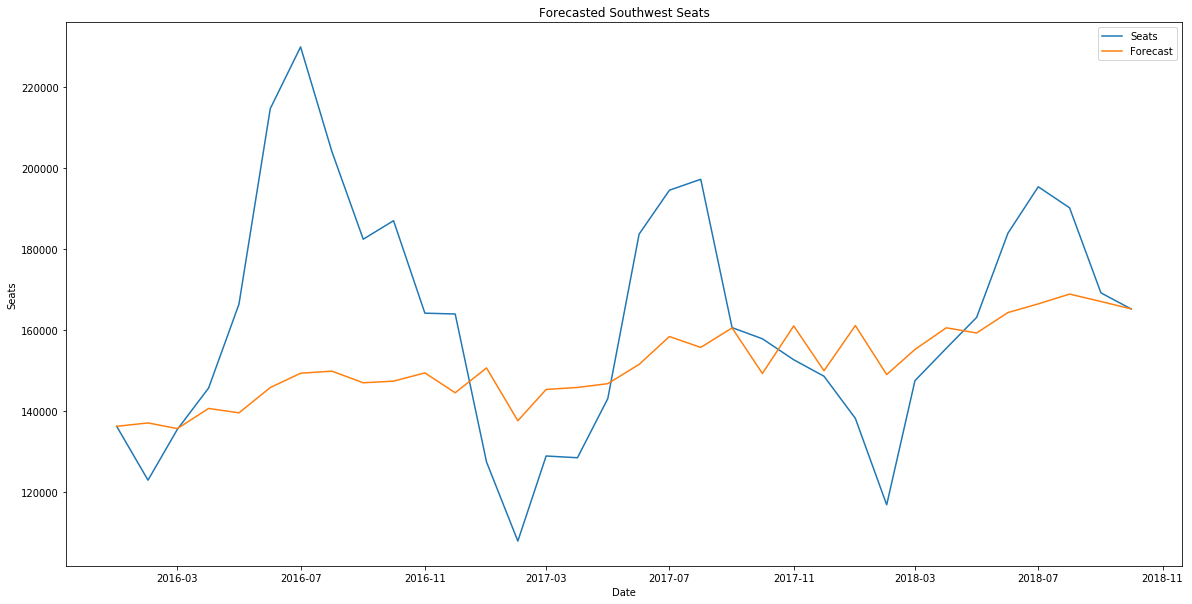

In [65]:
predictions_ARIMA_sw = np.exp(predictions_ARIMA_log_sw)

fig, ax = plt.subplots(figsize =(20,10))
plt.plot(grouped_sw_seats)
plt.plot(predictions_ARIMA_sw, label='Forecast')
plt.title('Forecasted Southwest Seats'% np.sqrt(sum((predictions_ARIMA_sw-grouped_sw_seats)**2)/len(grouped_sw_seats)))
plt.xlabel('Date')
plt.ylabel('Seats')
plt.legend();

In [66]:
next_two_months_sw = results_ARIMA.forecast(steps=2)[0]

next_two_months_sw

np.exp(next_two_months_sw)

array([ 167628.8905927 ,  167693.51057167])

#### So for November we predict 167,628 seats to be filled and for December we predcict 167,964 seats to be filled.

# Spirit Airlines Example - NK

In [67]:
data.head()

,Airline,Origin Code,Destination Code,Flights,Seats,ASMs,Block Mins,Average Miles
Travel Month,,,,,,,,
2016-01-01,AA,SEA,CLT,56,10472,23865688,16112,2279
2016-01-01,HA,SEA,OGG,31,9114,24060960,11470,2640
2016-01-01,AS,SEA,PSC,178,13528,2326816,9015,172
2016-01-01,DL,SEA,DEN,121,9877,10114048,19399,1024
2016-01-01,WN,SEA,SAN,70,10042,10544100,11155,1050


In [68]:
spirit = data[data['Airline'] == 'NK']
spirit.head()

,Airline,Origin Code,Destination Code,Flights,Seats,ASMs,Block Mins,Average Miles
Travel Month,,,,,,,,
2016-03-01,NK,SEA,LAX,15,2175,2074950,2303,954
2016-04-01,NK,SEA,LAS,33,5874,5086884,4752,866
2016-04-01,NK,SEA,LAX,60,8700,8299800,9180,954
2016-05-01,NK,SEA,LAX,62,8990,8576460,9610,954
2016-05-01,NK,SEA,LAS,62,11036,9557176,8928,866


In [69]:
grouped_spirit = spirit.groupby('Travel Month').agg(sum)
grouped_spirit.head()

,Flights,Seats,ASMs,Block Mins,Average Miles
Travel Month,,,,,
2016-03-01,15,2175,2074950,2303,954
2016-04-01,93,14574,13386684,13932,1820
2016-05-01,124,20026,18133636,18538,1820
2016-06-01,120,19380,17548680,18240,1820
2016-07-01,124,20026,18133636,19158,1820


In [70]:
grouped_seats_spirit = grouped_spirit['Seats']
grouped_seats_spirit

Travel Month
2016-03-01     2175
2016-04-01    14574
2016-05-01    20026
2016-06-01    19380
2016-07-01    20026
2016-08-01    20026
2016-09-01    19380
2016-10-01    20026
2016-11-01    20325
2016-12-01    21285
2017-01-01    21173
2017-02-01    20044
2017-03-01    22599
2017-04-01    22220
2017-05-01    28749
2017-06-01    34650
2017-07-01    35805
2017-08-01    35805
2017-09-01    26698
2017-10-01    25301
2017-11-01    18616
2017-12-01    17201
2018-01-01    17205
2018-02-01    15540
2018-03-01    17205
2018-04-01    35024
2018-05-01    47992
2018-06-01    56065
2018-07-01    59272
2018-08-01    59272
2018-09-01    36918
2018-10-01    33458
Name: Seats, dtype: int64

## Plot the data 

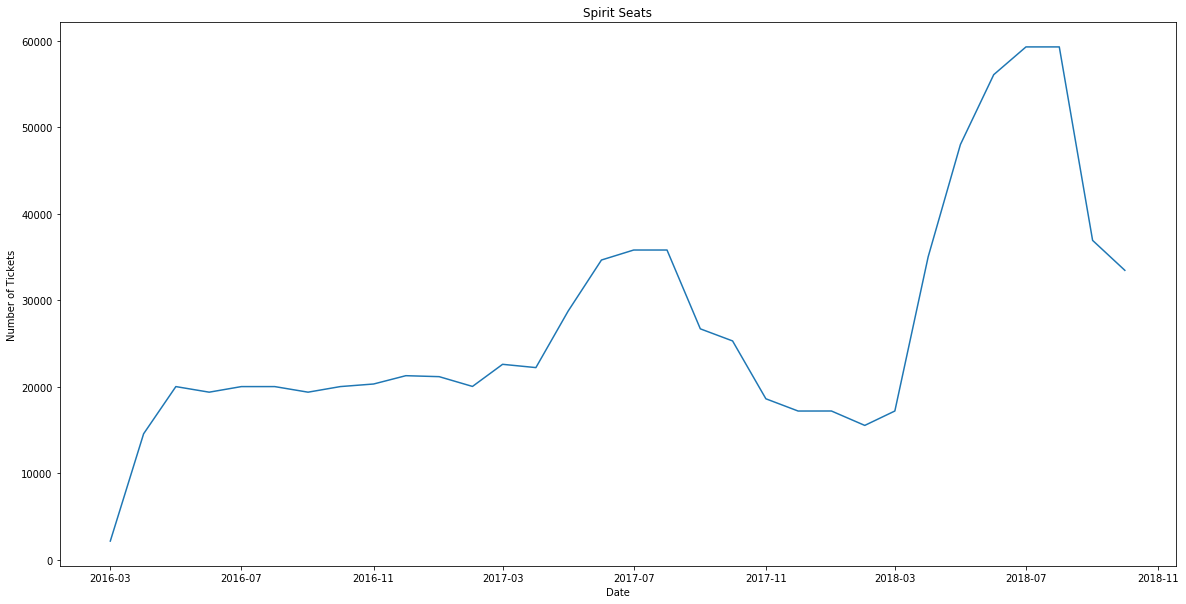

In [71]:
fig, ax = plt.subplots(figsize =(20,10))
fig = plt.plot(grouped_seats_spirit)
plt.title('Spirit Seats')
plt.xlabel('Date')
plt.ylabel('Number of Tickets');

## Test stationarity 

/Users/alexanderschultz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=6,center=False).mean()
  """
/Users/alexanderschultz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=6,center=False).std()
  


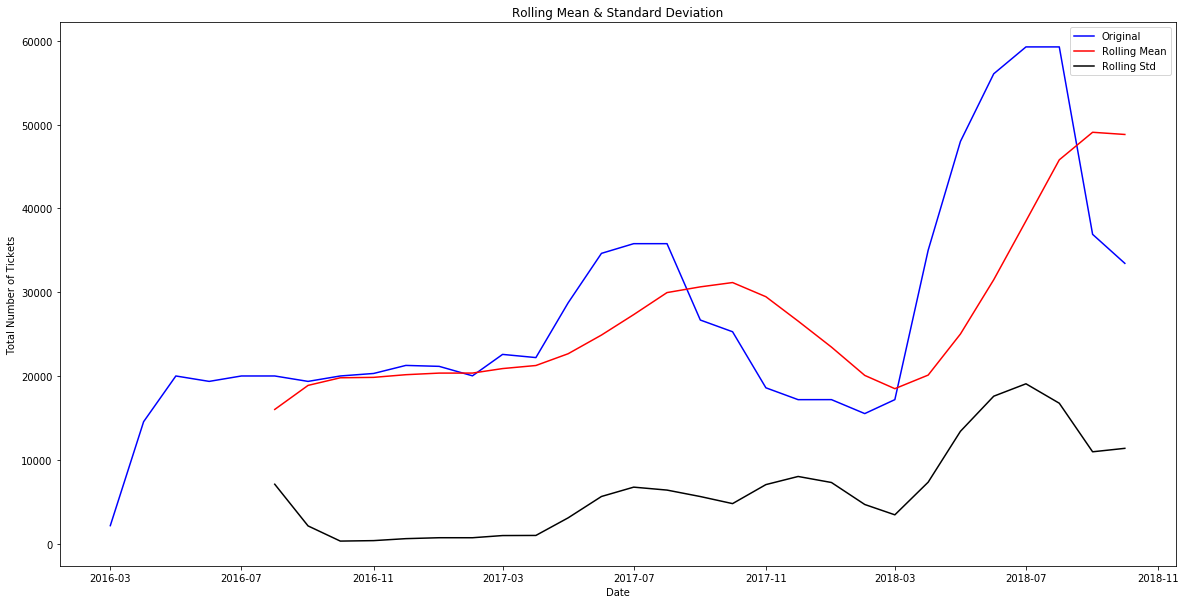

Results of Dickey-Fuller Test:
Test Statistic                 -1.067663
p-value                         0.727794
#Lags Used                      9.000000
Number of Observations Used    22.000000
Critical Value (1%)            -3.769733
Critical Value (5%)            -3.005426
Critical Value (10%)           -2.642501
dtype: float64


In [72]:
test_stationarity(grouped_seats_spirit)

## Log the Spirit Data

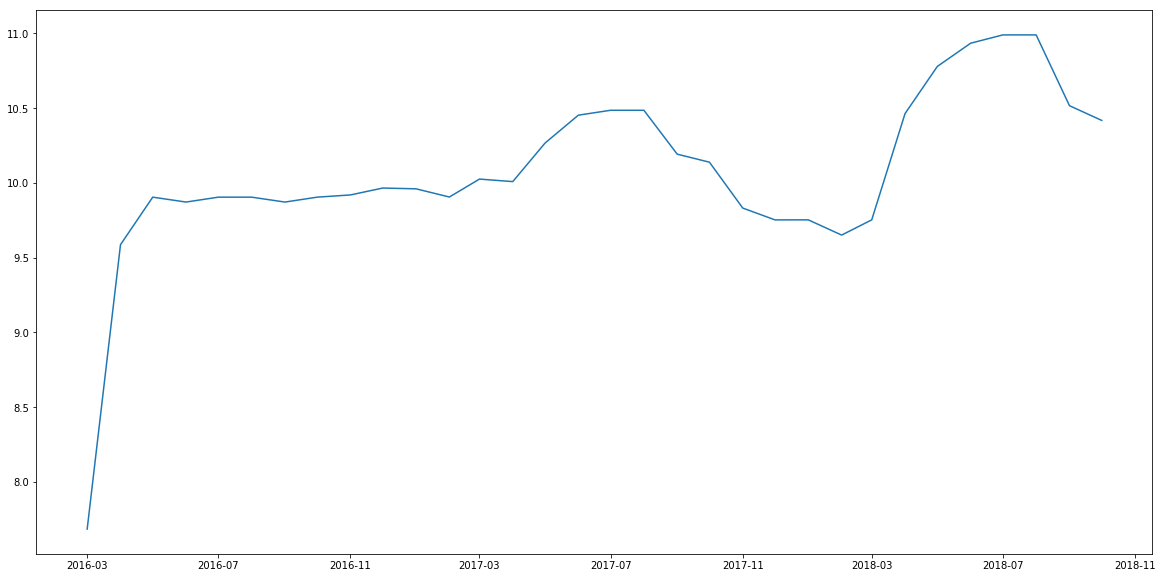

In [73]:
log_seats_spirit = np.log(grouped_seats_spirit)

fig, ax = plt.subplots(figsize =(20,10))
plt.plot(log_seats_spirit);

## Find the six month rolling average 

/Users/alexanderschultz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=6,center=False).mean()
  """Entry point for launching an IPython kernel.


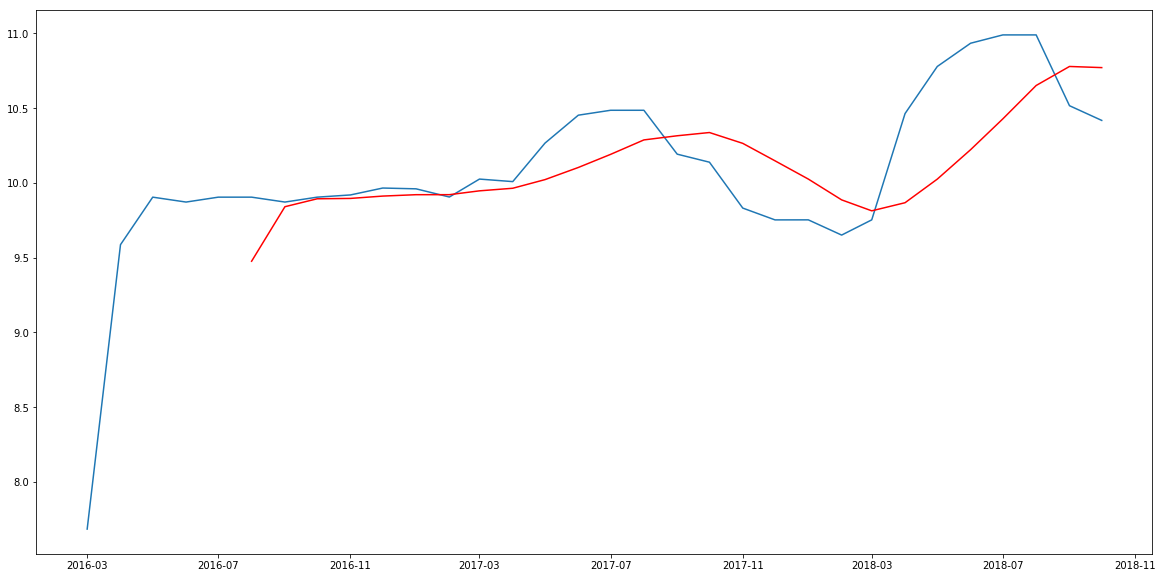

In [74]:
moving_average_spirit = pd.rolling_mean(log_seats_spirit, 6)
fig, ax = plt.subplots(figsize =(20,10))
plt.plot(log_seats_spirit)
plt.plot(moving_average_spirit, color = 'red');

## Removing the rolling average from the initial data set 

In [75]:
moving_average_diff_spirit = log_seats_spirit - moving_average_spirit
moving_average_diff_spirit.head(10)

Travel Month
2016-03-01         NaN
2016-04-01         NaN
2016-05-01         NaN
2016-06-01         NaN
2016-07-01         NaN
2016-08-01    0.428431
2016-09-01    0.031106
2016-10-01    0.010930
2016-11-01    0.023280
2016-12-01    0.053804
Name: Seats, dtype: float64

## Remove the NANs, Test for Stationarity 

/Users/alexanderschultz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=6,center=False).mean()
  """
/Users/alexanderschultz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=6,center=False).std()
  


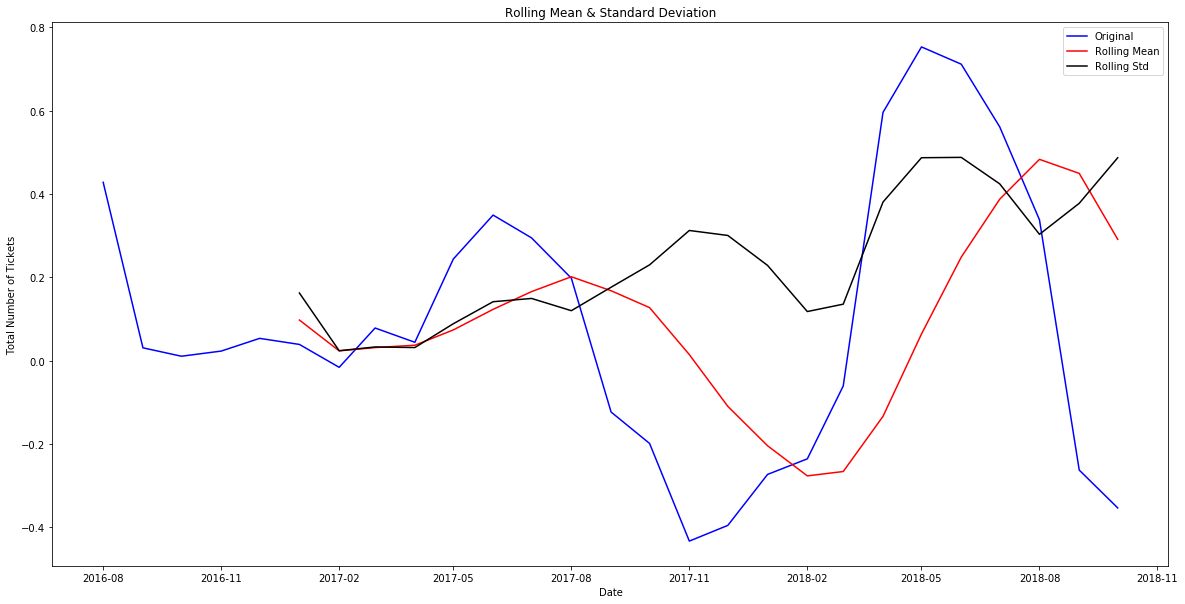

Results of Dickey-Fuller Test:
Test Statistic                 -2.241852
p-value                         0.191407
#Lags Used                      6.000000
Number of Observations Used    20.000000
Critical Value (1%)            -3.809209
Critical Value (5%)            -3.021645
Critical Value (10%)           -2.650713
dtype: float64


In [76]:
moving_average_diff_spirit.dropna(inplace=True)
test_stationarity(moving_average_diff_spirit)

## Exponentially Weighted Moving Average 

/Users/alexanderschultz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(halflife=6,min_periods=0,adjust=True,ignore_na=False).mean()
  """Entry point for launching an IPython kernel.


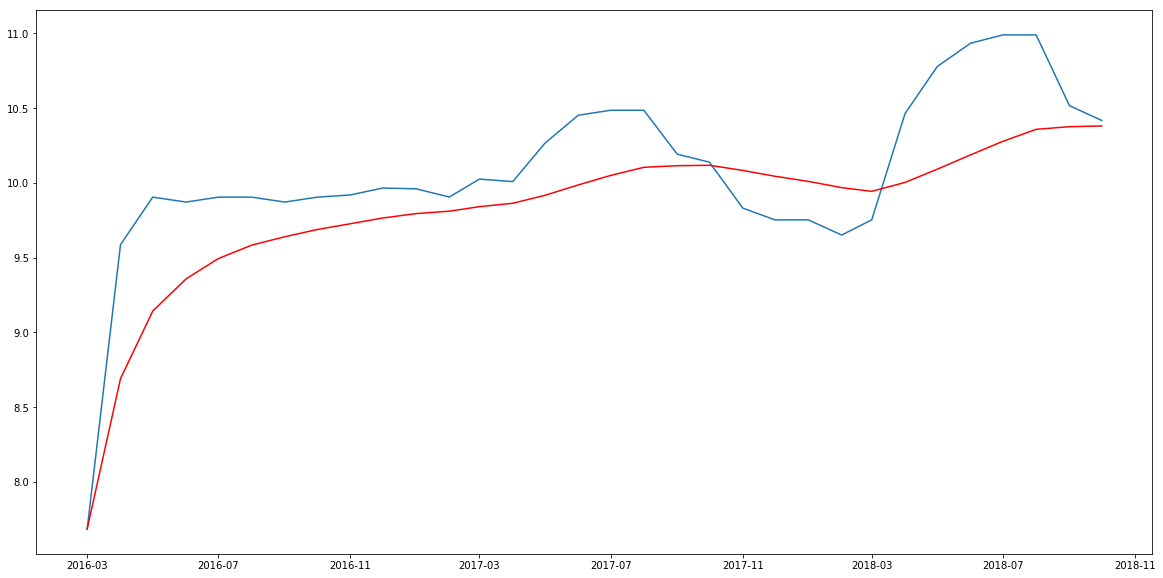

In [77]:
exp_weighted_avg_spirit = pd.ewma(log_seats_spirit, halflife=6)

fig, ax = plt.subplots(figsize =(20,10))
plt.plot(log_seats_spirit)
plt.plot(exp_weighted_avg_spirit, color='red');

### Test for stationarity

/Users/alexanderschultz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=6,center=False).mean()
  """
/Users/alexanderschultz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=6,center=False).std()
  


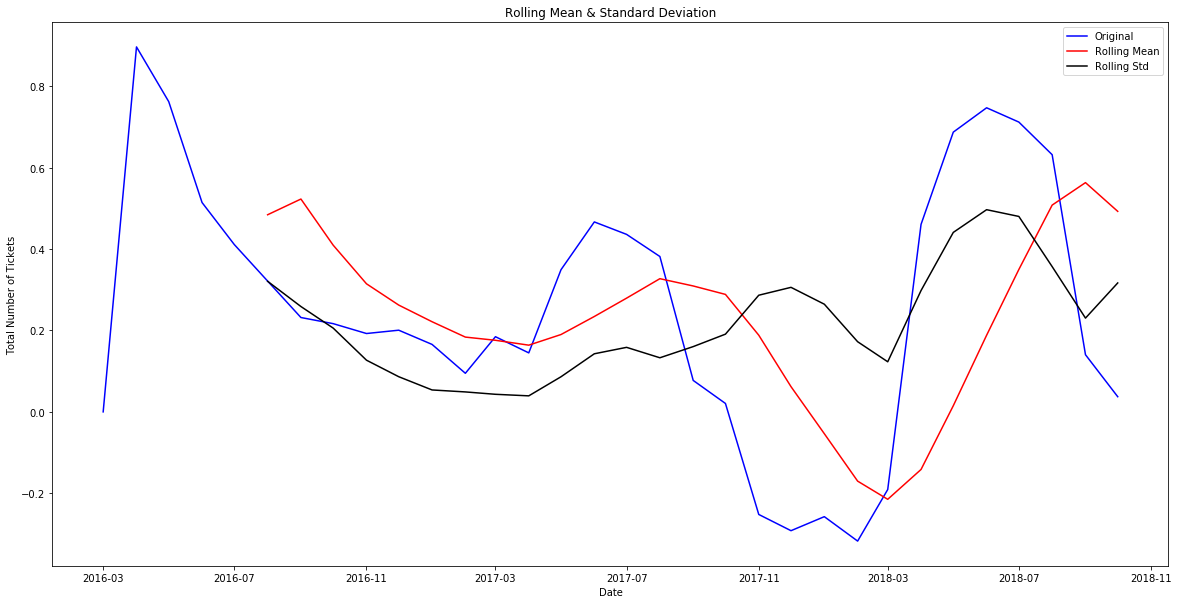

Results of Dickey-Fuller Test:
Test Statistic                 -3.332948
p-value                         0.013468
#Lags Used                      4.000000
Number of Observations Used    27.000000
Critical Value (1%)            -3.699608
Critical Value (5%)            -2.976430
Critical Value (10%)           -2.627601
dtype: float64


In [78]:
exp_weighted_avg_diff_spirit = log_seats_spirit - exp_weighted_avg_spirit
test_stationarity(exp_weighted_avg_diff_spirit)

## Eliminating Trend and Seasonality (Differencing and Decomposition)

### Differencing 

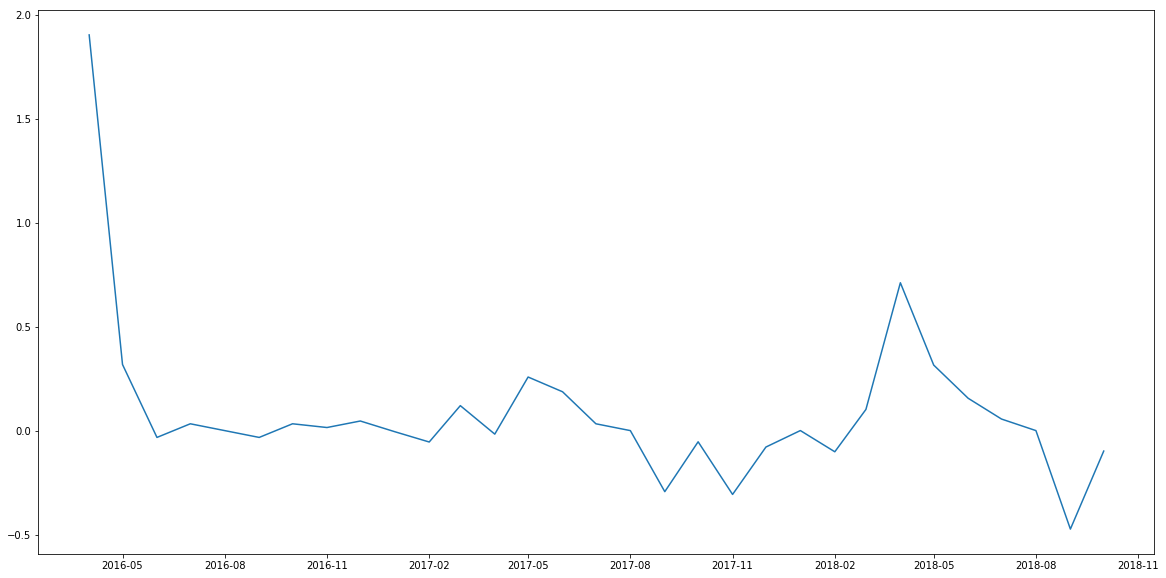

In [79]:
log_shift_spirit = log_seats_spirit - log_seats_spirit.shift()
fig, ax = plt.subplots(figsize =(20,10))
plt.plot(log_shift_spirit);

### Drop NANs, test for stationarity 

/Users/alexanderschultz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=6,center=False).mean()
  """
/Users/alexanderschultz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=6,center=False).std()
  


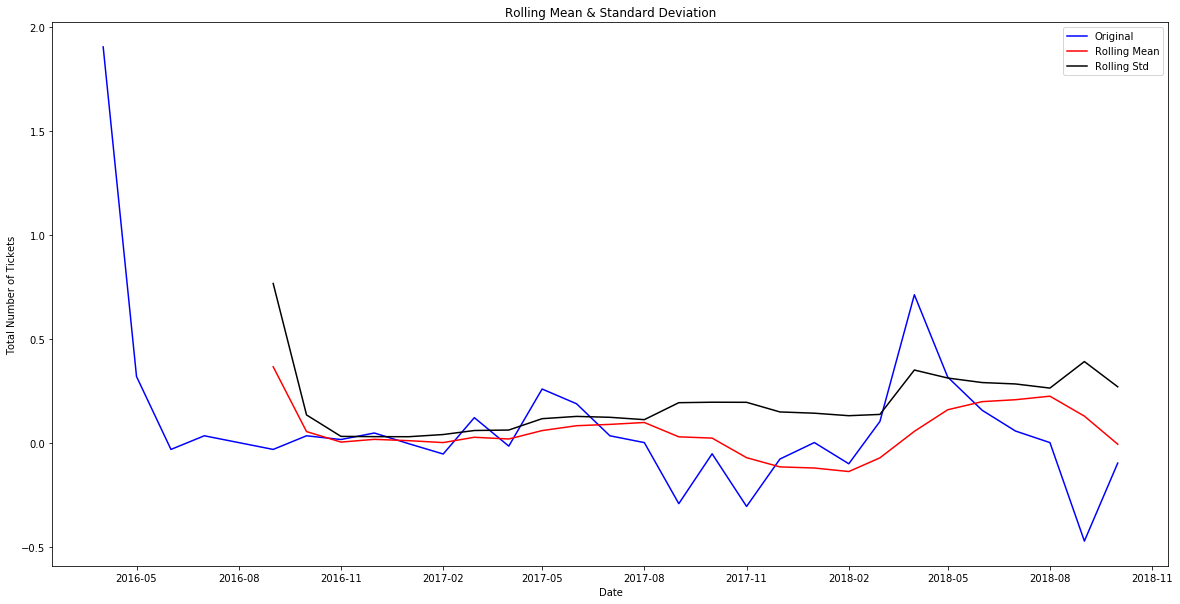

Results of Dickey-Fuller Test:
Test Statistic                 -2.955643
p-value                         0.039250
#Lags Used                      8.000000
Number of Observations Used    22.000000
Critical Value (1%)            -3.769733
Critical Value (5%)            -3.005426
Critical Value (10%)           -2.642501
dtype: float64


In [80]:
log_shift_spirit.dropna(inplace=True)
test_stationarity(log_shift_spirit);

### Decomposing

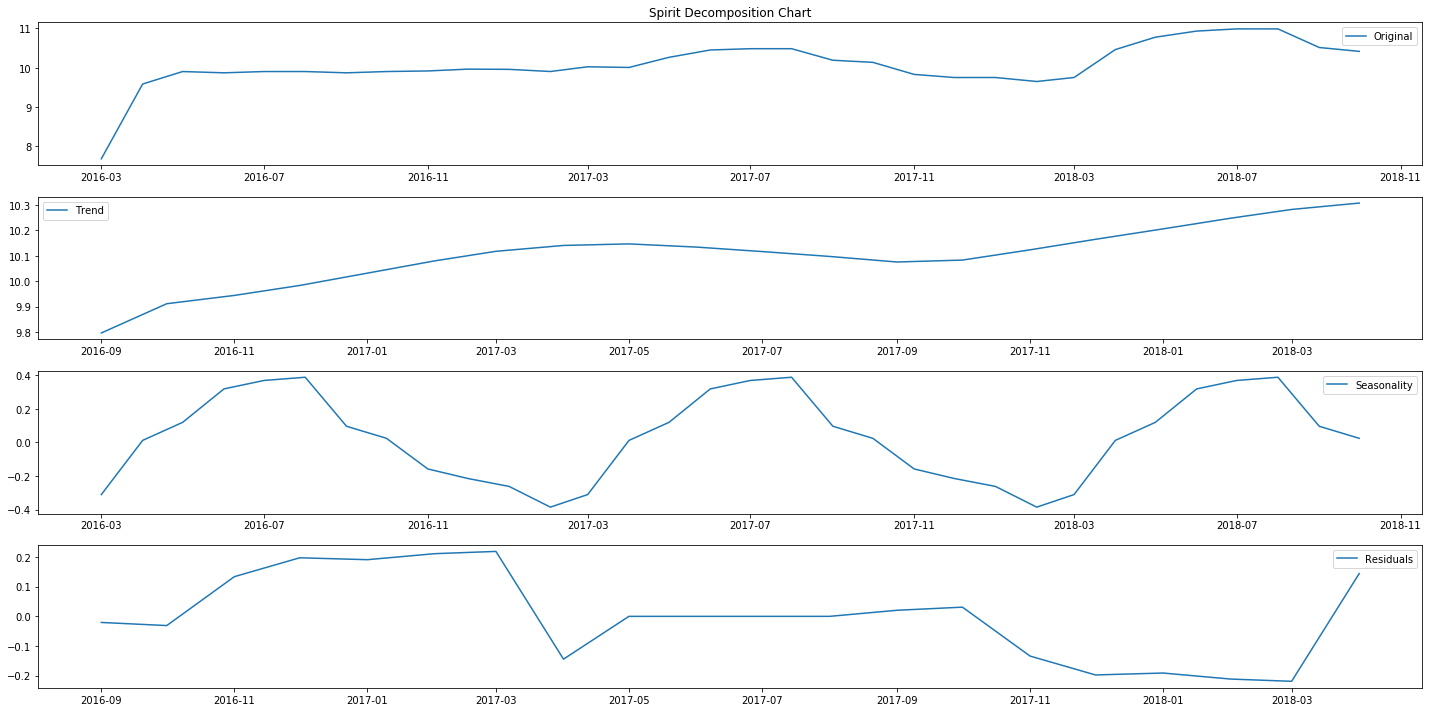

In [81]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(log_seats_spirit)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
fig, ax = plt.subplots(figsize =(20,10))
plt.subplot(411)
plt.title("Spirit Decomposition Chart")
plt.plot(log_seats_spirit, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout();

### Check for stationarity 

/Users/alexanderschultz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=6,center=False).mean()
  """
/Users/alexanderschultz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=6,center=False).std()
  


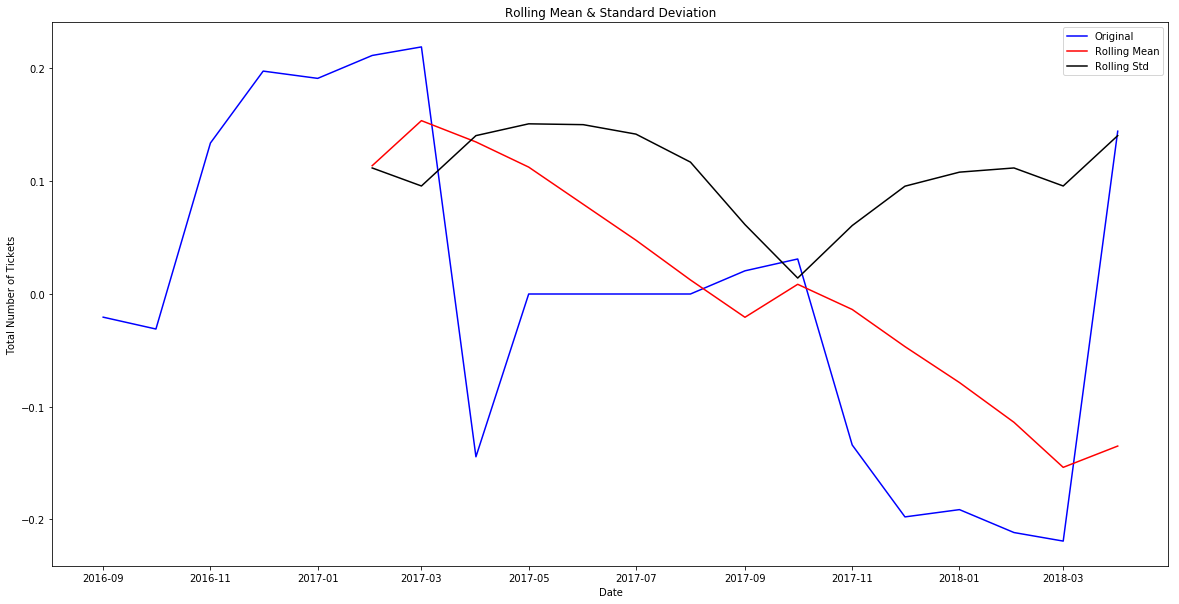

Results of Dickey-Fuller Test:
Test Statistic                 -1.834105
p-value                         0.363666
#Lags Used                      8.000000
Number of Observations Used    11.000000
Critical Value (1%)            -4.223238
Critical Value (5%)            -3.189369
Critical Value (10%)           -2.729839
dtype: float64


In [82]:
log_seats_decompose_spirit = residual
log_seats_decompose_spirit.dropna(inplace=True)
test_stationarity(log_seats_decompose_spirit)

# Forecasting Spirit Timeseries

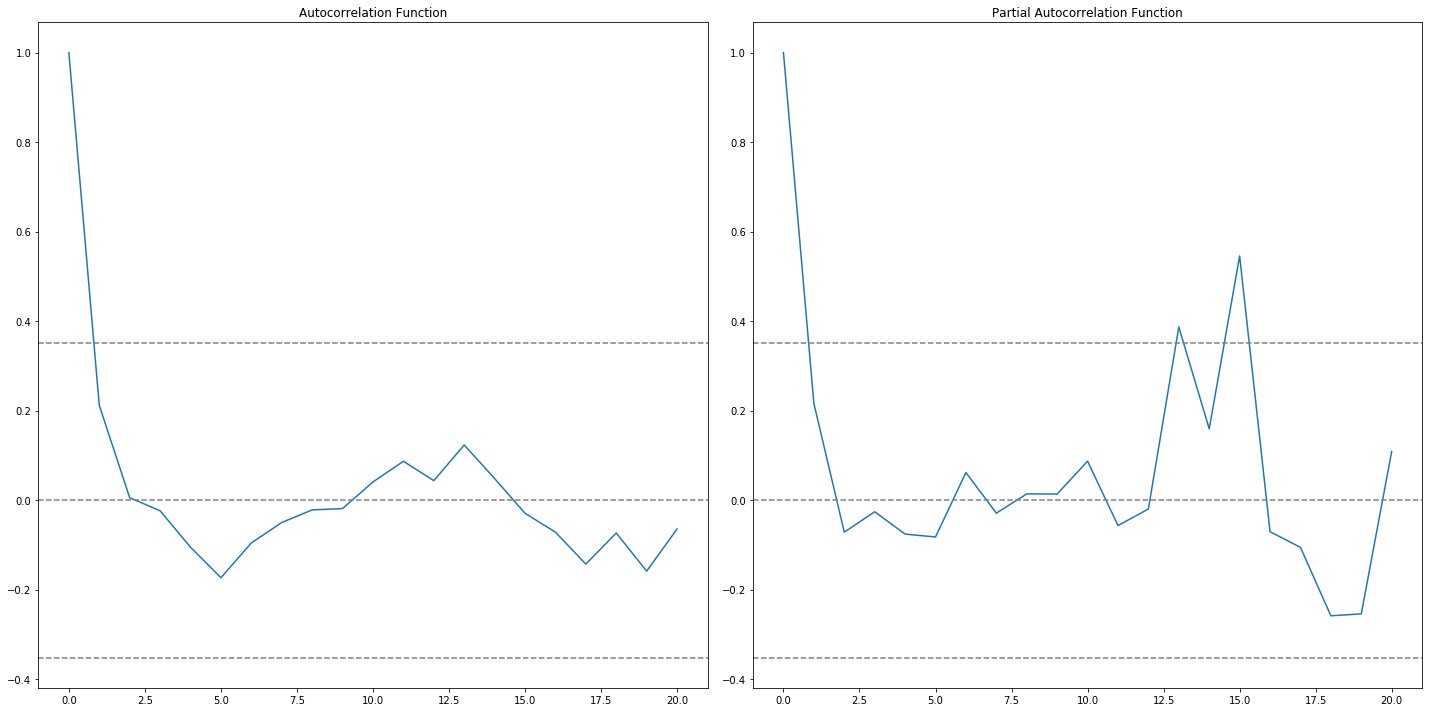

In [83]:
lag_acf_spirit = acf(log_shift_spirit, nlags=20)
lag_pacf_spirit = pacf(log_shift_spirit, nlags=20, method='ols')

#Plot ACF: 
fig, ax = plt.subplots(figsize =(20,10))
plt.subplot(121) 
plt.plot(lag_acf_spirit)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(log_shift_spirit)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(log_shift_spirit)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf_spirit)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(log_shift_spirit)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(log_shift_spirit)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout();

# ARIMA Model - Spirit

## AR Model

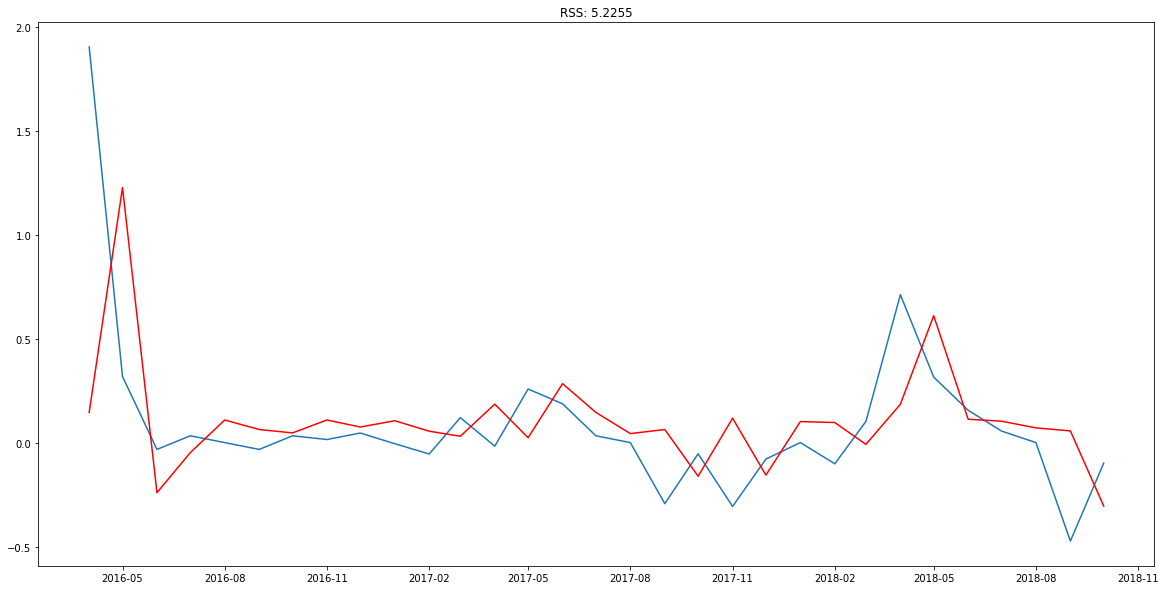

In [84]:
model = ARIMA(log_seats_spirit, order=(2,1,0))  
results_AR = model.fit(disp=-1) 

fig, ax = plt.subplots(figsize =(20,10))
plt.plot(log_shift_spirit)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-log_shift_spirit)**2));

## MA Model

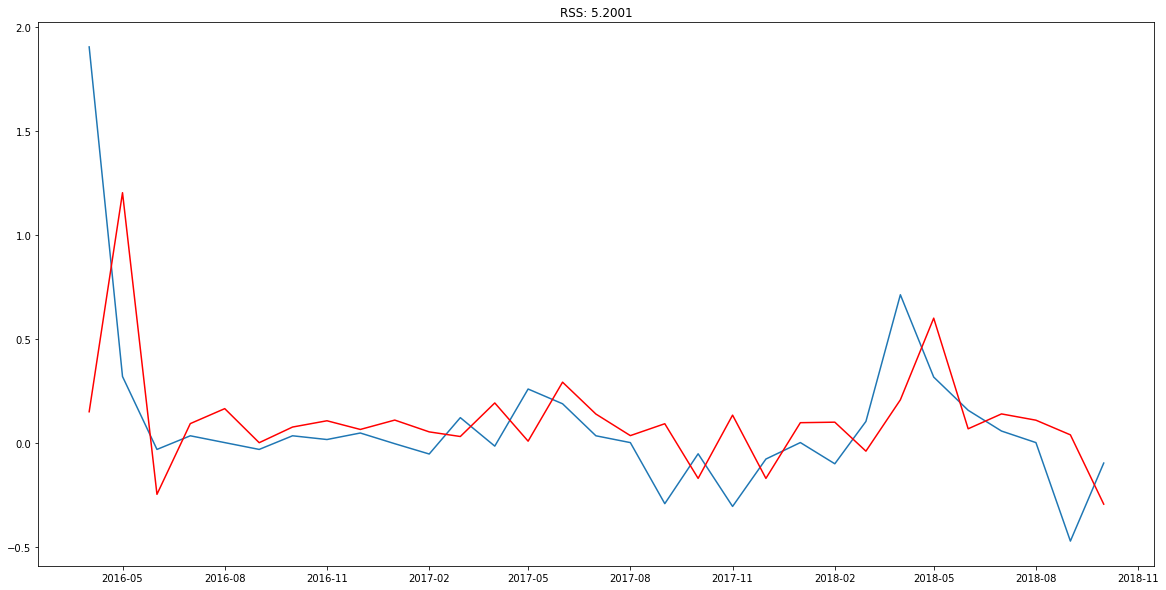

In [85]:
model = ARIMA(log_seats_spirit, order=(0, 1, 2))  
results_MA = model.fit(disp=-1) 

fig, ax = plt.subplots(figsize =(20,10))
plt.plot(log_shift_spirit)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-log_shift_spirit)**2));

## Combined Model 

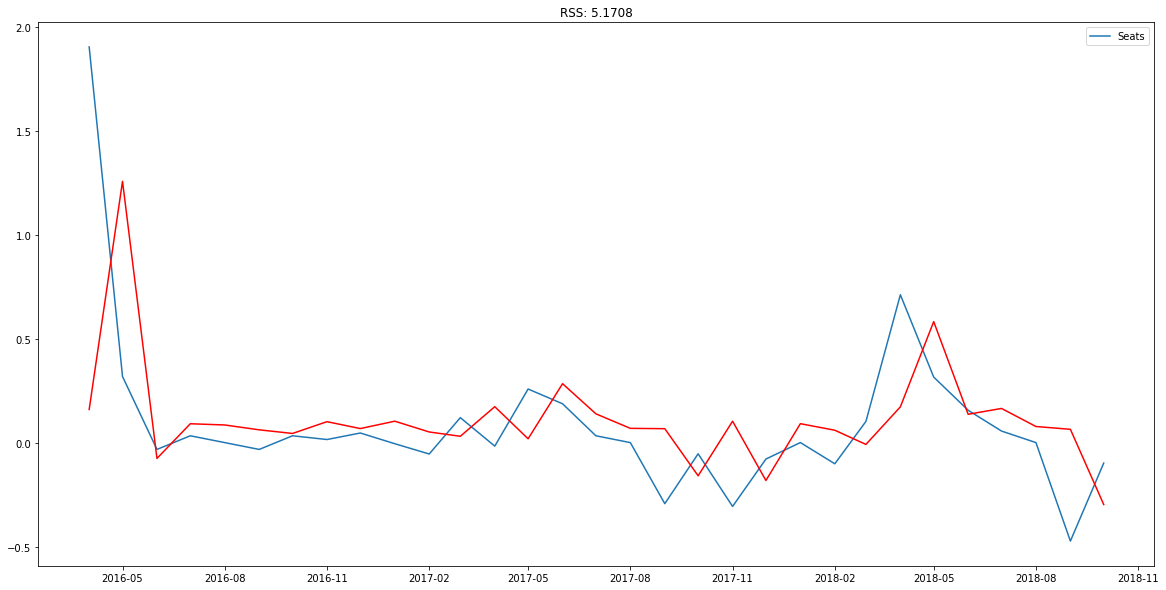

In [86]:
model = ARIMA(log_seats_spirit, order=(1,1,1))  
results_ARIMA = model.fit(disp=-1)  

fig, ax = plt.subplots(figsize =(20,10))
plt.plot(log_shift_spirit)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-log_shift_spirit)**2))
plt.legend();

## Bringing it back to scale 

In [87]:
predictions_ARIMA_diff_spirit = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff_sw.head())

predictions_ARIMA_diff_cumsum_spirit = predictions_ARIMA_diff_spirit.cumsum()
print(predictions_ARIMA_diff_cumsum_sw.head())

predictions_ARIMA_log_spirit = pd.Series(log_seats_spirit.iloc[0], index=log_seats_spirit.index)
predictions_ARIMA_log_spirit = predictions_ARIMA_log_spirit.add(predictions_ARIMA_diff_cumsum_spirit,fill_value=0)
predictions_ARIMA_log_spirit.head()

Travel Month
2016-02-01    0.006182
2016-03-01   -0.010331
2016-04-01    0.036105
2016-05-01   -0.007774
2016-06-01    0.043856
dtype: float64
Travel Month
2016-02-01    0.006182
2016-03-01   -0.004149
2016-04-01    0.031956
2016-05-01    0.024182
2016-06-01    0.068038
dtype: float64


Travel Month
2016-03-01    7.684784
2016-04-01    7.844029
2016-05-01    9.100072
2016-06-01    9.023961
2016-07-01    9.114607
dtype: float64

# Make Predictions

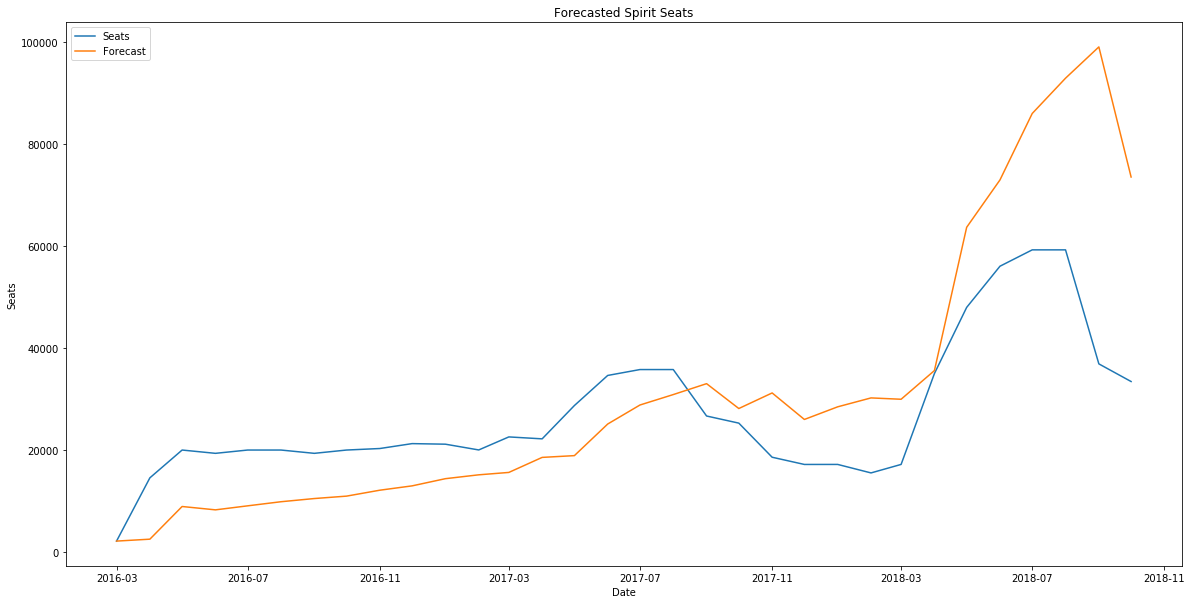

In [88]:
predictions_ARIMA_spirit = np.exp(predictions_ARIMA_log_spirit)

fig, ax = plt.subplots(figsize =(20,10))
plt.plot(grouped_seats_spirit)
plt.plot(predictions_ARIMA_spirit, label='Forecast')
plt.title('Forecasted Spirit Seats'% np.sqrt(sum((predictions_ARIMA_spirit-grouped_seats_spirit)**2)/len(grouped_seats_spirit)))
plt.xlabel('Date')
plt.ylabel('Seats')
plt.legend();

In [89]:
next_two_months_spirit = results_ARIMA.forecast(steps=2)[0]

print(next_two_months_spirit)

np.exp(next_two_months_spirit)

[ 10.53335936  10.67355926]


array([ 37547.39812202,  43198.42272924])

#### So for November we predict 37,547 seats to be filled and for December we predcict 43,198 seats to be filled.